# Анализ столкновений птиц с самолетами

__Цель__ - проанализировать данные, выявить закономерности, а также факторы, которые оказывают влияние на столкновения птиц с воздушными судами. Особенное внимание уделить исследованию влияния погодных условий на столкновения. Подготовить данные для отправки их коллегам DS для построения модели предсказания.

__Задачи__:
1.	Предобработать данные, определить типы данных в таблице. 
2.	Обработать данные о погоде (WND, CIG, VIS, TMP, DEW, SLP), преобразовать их в отдельные столбцы. 
3.	Провести исследовательский анализ данных (EDA)
4.	Выявить интересные закономерности в данных, определить, влияет ли погода на столкновения птиц с самолетами. Проверить гипотезы.

## Описание данных

[data_DE_strikes_and_weather.csv](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FyKklYesmmCsdcTRYDTPOBXWERozUGgIe9tSkfAD2J5LP40ZTeWk7XGtK1O2fYcQ9q%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2F2_%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%BE%D1%82%20%D0%A0%D0%B0%D1%88%D0%B8%D1%82%D0%B0%2Fdata_DE_strikes_and_weather.csv&name=data_DE_strikes_and_weather.csv) - объединенный датасет столкновений и погоды

[flights_data_DE.csv](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FyKklYesmmCsdcTRYDTPOBXWERozUGgIe9tSkfAD2J5LP40ZTeWk7XGtK1O2fYcQ9q%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2F2_%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%BE%D1%82%20%D0%A0%D0%B0%D1%88%D0%B8%D1%82%D0%B0%2Fflights_data_DE.csv&name=flights_data_DE.csv) - датасет с рейсами для топ-22 аэропортов по числу столкновений)

__Датасет data_DE_strikes_and_weather.csv___

Данный датасет получен объединением данных о столкновениях с животными воздушных судов от FAA (Federal Aviation Administration) https://www.faa.gov/ и данных о погоде от NCEI (National Centers for Environmental Information) https://www.ncei.noaa.gov/. Данные о погоде брались с ближайшей к аэропорту станции, разница составляет не более 1 часа. Данные о погоде не подгружались, если не указаны координаты и/или время столкновения. Записи страйков с 01/01/2018 по 30/08/2023. Если не указано время, то данные за 12:00

Краткое описание столбцов датасета data_DE_strikes_and_weather.csv (__данные от FAA__):

`Column1` - Столбец индекса строки\
`INDEX_NR` - Индивидуальный номер записи\
`INCIDENT_DATE` - Дата инцидента\
`INCIDENT_MONTH` - Месяц инцидента\
`INCIDENT_YEAR` - Год инцидента\
`TIME` - Время (час и минута) по местному времени\
`TIME_OF_DAY` - Время суток\
`AIRPORT_ID` - Идентификатор аэропорта по международной организации гражданской авиации\
`AIRPORT` - Название аэропорта\
`LATITUDE_x` - Широта аэропорта\
`LONGITUDE_x` - Долгота аэропорта\
`RUNWAY` - Взлетно-посадочная полоса\
`STATE` - Штат\
`FAAREGION` - Регион FAA, где расположен аэропорт\
`LOCATION` - Информация о местоположении\
`OPID` - Код оператора авиакомпании\
`OPERATOR` - Трехбуквенный код оператора судна по международной организации гражданской авиации\
`REG` - Регистрация воздушного судна\
`FLT` - Номер рейса\
`AIRCRAFT` - Воздушное судно\
`AMA` - Код производителя воздушного судна по международной организации гражданской авиации\
`AMO` - Код модели воздушного судна по международной организации гражданской авиации\
`EMA` - Код производителя двигателя\
`EMO` - Код модели двигателя\
`AC_CLASS` - Тип воздушного судна\
`AC_MASS` - Масса воздушного судна\
`TYPE_ENG` - Тип двигателя\
`NUM_ENGS` - Количество двигателей\
`ENG_1_POS` - Расположение двигателя №1 на воздушном судне\
`ENG_2_POS` - Расположение двигателя №2 на воздушном судне\
`ENG_3_POS` - Расположение двигателя №3 на воздушном судне\
`ENG_4_POS` - Расположение двигателя №4 на воздушном судне\
`PHASE_OF_FLIGHT` - Фаза полета во время инцидента\
`HEIGHT` - Высота над уровнем земли в футах\
`SPEED` - Скорость в узлах\
`DISTANCE` - Расстояние в морских милях от аэропорта\
`SKY` - Тип облачного покрова, если есть\
`PRECIPITATION` - Осадки\
`AOS` - Время, в течение которого воздушное судно находилось вне эксплуатации, в часах\
`COST_REPAIRS` - Оценочная стоимость ремонта или замены в долларах США\
`COST_OTHER` - Другие оценочные затраты в долларах США\
`COST_REPAIRS_INFL_ADJ` - Стоимость ремонта, скорректированная на инфляцию\
`COST_OTHER_INFL_ADJ` - Другие затраты, скорректированные на инфляцию\
`INGESTED_OTHER` - Животные, попавшие в другие части воздушного судна, кроме двигателей\
`INDICATED_DAMAGE` - Указывает, было ли повреждение воздушного судна\
`DAMAGE_LEVEL` - Уровень повреждения\
`STR_RAD` - Столкновение с радомом\
`DAM_RAD` - Повреждение радома\
`STR_WINDSHLD` - Столкновение с лобовым стеклом\
`DAM_WINDSHLD` - Повреждение лобового стекла\
`STR_NOSE` - Столкновение с носовой частью\
`DAM_NOSE` - Повреждение носовой части\
`STR_ENG1` - Столкновение с двигателем №1\
`DAM_ENG1` - Повреждение двигателя №1\
`ING_ENG1` - Попадание в двигатель №1\
`STR_ENG2` - Столкновение с двигателем №2\
`DAM_ENG2` - Повреждение двигателя №2\
`ING_ENG2` - Попадание в двигатель №2\
`STR_ENG3` - Столкновение с двигателем №3\
`DAM_ENG3` - Повреждение двигателя №3\
`ING_ENG3` - Попадание в двигатель №3\
`STR_ENG4` - Столкновение с двигателем №4\
`DAM_ENG4` - Повреждение двигателя №4\
`ING_ENG4` - Попадание в двигатель №4\
`STR_PROP` - Столкновение с пропеллером\
`DAM_PROP` - Повреждение пропеллера\
`STR_WING_ROT` - Столкновение с крылом или ротором\
`DAM_WING_ROT` - Повреждение крыла или ротора\
`STR_FUSE` - Столкновение с фюзеляжем\
`DAM_FUSE` - Повреждение фюзеляжа\
`STR_LG` - Столкновение с шасси\
`DAM_LG` - Повреждение шасси\
`STR_TAIL` - Столкновение с хвостовой частью\
`DAM_TAIL` - Повреждение хвостовой части\
`STR_LGHTS` - Столкновение со светильниками\
`DAM_LGHTS` - Повреждение светильников\
`STR_OTHER` - Столкновение с другими частями\
`DAM_OTHER` - Повреждение других частей\
`OTHER_SPECIFY` - Какая часть была повреждена, кроме указанных выше\
`EFFECT` - Влияние на полет\
`EFFECT_OTHER` - Другие влияния на полет\
`BIRD_BAND_NUMBER` - Номер кольца птицы, связанный с животным\
`SPECIES_ID` - Код типа птицы или другого животного по международной организации гражданской авиации\
`SPECIES` - Общее название птицы или другого животного\
`REMARKS` - Замечания\
`REMAINS_COLLECTED` - Указывает, были ли найдены и собраны остатки птицы или дикой природы\
`REMAINS_SENT` - Указывает, были ли отправлены остатки в Смитсоновский институт для идентификации\
`WARNED` - Предупрежден ли пилот о птицах/дикой природе\
`NUM_SEEN` - Количество птиц/дикой природы, увиденных пилотом\
`NUM_STRUCK` - Количество птиц/дикой природы, с которыми произошло столкновение\
`SIZE` - Размер птицы\
`ENROUTE_STATE` - Если столкновение не произошло на подходе, взлете, посадке или таксировке, воздушное судно было в пути. Это показывает местоположение\
`NR_INJURIES` - Количество пострадавших\
`NR_FATALITIES` - Количество смертельных случаев\
`COMMENTS` - Комментарии\
`REPORTED_NAME` - Имя (имена) лица (лиц), составившего отчет\
`REPORTED_TITLE` - Звание (звания) лица (лиц), составившего отчет\
`SOURCE_x` - Тип отчета\
`PERSON` - Кто заполнял отчет\
`LUPDATE` - Последнее время обновления записи\
`TRANSFER` - Неиспользуемое поле на данный момент\


__Столбцы данных о параметрах погоды от NCEI:__

`Unnamed: 0` - Столбец индекса строки\
`ID` - ID метеостанции\
`STATION` - Позывной метеостанции\
`DATE` - Дата и время\
`SOURCE_y` - Код источника данных\
`LATITUDE_y` - Широта метеостанции\
`LONGITUDE_y` - Долгота метеостанции\
`ELEVATION` - Высота метеостанции над уровнем моря\
`NAME` - Название метеостанции\
`REPORT_TYPE` - Тип отчета\
`CALL_SIGN` - Идентификатор аэропорта по международной организации гражданской авиации\
`QUALITY_CONTROL` - Код контроля качества\
`WND` - параметры ветра\
`CIG` - параметры нижней границы облаков\
`VIS` - параметры видимости\
`TMP` - параметры температуры\
`DEW` - параметры точки росы\
`SLP` - параметры давления\


__Датасет flights_data_DE.csv__

Датасет представляет из себя агрегированные данные с рейсами для первых 22 аэропортов по количеству столкновений с животными. Данные получены от BTS (Bureau of Transportation Statistics) https://www.bts.go

`Year` - год (столбец агрегации)\
`Month` - месяц (столбец агрегации)\
`DOMESTIC` - число внутренних рейсов\
`INTERNATIONAL` - число международных рейсов\
`TOTAL` - всего рейсов (сумма столбцов DOMESTIC и INTERNATIONAL)\
`airport` - идентификатор аэропорта международной организации гражданской авиации (столбец агрегации)\
`direction` - направление: Origin - вылет, Destination - прилет

### Загрузка и обзор данных

In [1]:
# импорт библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# загрузка данных
try:
    df = pd.read_csv('C:/Users/Asus/Analytics/data/data_DE_strikes_and_weather.csv', low_memory=False)
except FileNotFoundError:
    print('Please, specify path to data_DE_strikes_and_weather.csv file')
    
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(5)

Column1  INDEX_NR            INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR  \
0        0    802071  2018-01-06 00:00:00.000               1           2018   
1        1    802074  2018-01-22 00:00:00.000               1           2018   
2        2    802081  2018-01-09 00:00:00.000               1           2018   
3        3    802082  2018-01-10 00:00:00.000               1           2018   
4        4    802083  2018-01-18 00:00:00.000               1           2018   

    TIME TIME_OF_DAY AIRPORT_ID                                     AIRPORT  \
0    NaN         NaN       KDFW                 DALLAS/FORT WORTH INTL ARPT   
1    NaN         NaN       KIAH  GEORGE BUSH INTERCONTINENTAL/ HOUSTON ARPT   
2  12:57         Day       KTEB                           TETERBORO AIRPORT   
3    NaN         NaN       KPGD                            PUNTA GORDA ARPT   
4    NaN         NaN       KCLT                 CHARLOTTE/DOUGLAS INTL ARPT   

   LATITUDE_x  LONGITUDE_x  RUNWAY STATE FAAREGION LOCATION OPID   OPERATOR  \
0    32.89595    -97.03720     17C    TX      ASW       NaN  ENY  ENVOY AIR   
1    29.98047    -95.33972  TWY EE    TX      ASW       NaN  UNK    UNKNOWN   
2    40.85010    -74.06084      24    NJ      AEA       NaN  BUS   BUSINESS   
3    26.92019    -81.99053       4    FL      ASO       NaN  UNK    UNKNOWN   
4    35.21401    -80.94313     36R    NC      ASO       NaN  UNK    UNKNOWN   

      REG   FLT            AIRCRAFT  AMA  AMO   EMA  EMO AC_CLASS  AC_MASS  \
0  N234JW  3631             EMB-170  332  NaN  22.0  4.0      A        4.0   
1     NaN   NaN             UNKNOWN  NaN  NaN   NaN  NaN      NaN      NaN   
2  N679MS   972  EMB-500 PHENOM 100  332  NaN  31.0  NaN      A        2.0   
3     NaN   NaN             UNKNOWN  NaN  NaN   NaN  NaN      NaN      NaN   
4     NaN   NaN             UNKNOWN  NaN  NaN   NaN  NaN      NaN      NaN   

  TYPE_ENG  NUM_ENGS  ENG_1_POS  ENG_2_POS  ENG_3_POS  ENG_4_POS  \
0        D       2.0        1.0        1.0        NaN        NaN   
1      NaN       NaN        NaN        NaN        NaN        NaN   
2        D       2.0        5.0        5.0        NaN        NaN   
3      NaN       NaN        NaN        NaN        NaN        NaN   
4      NaN       NaN        NaN        NaN        NaN        NaN   

  PHASE_OF_FLIGHT  HEIGHT  SPEED  DISTANCE         SKY PRECIPITATION  AOS  \
0        Approach   300.0  133.0       NaN    No Cloud           NaN  1.0   
1             NaN     NaN    NaN       0.0         NaN           NaN  NaN   
2        Approach     NaN    NaN       2.0  Some Cloud           NaN  NaN   
3             NaN     NaN    NaN       0.0         NaN           NaN  NaN   
4             NaN     NaN    NaN       0.0         NaN           NaN  NaN   

   COST_REPAIRS  COST_OTHER  COST_REPAIRS_INFL_ADJ  COST_OTHER_INFL_ADJ  \
0           NaN       100.0                    NaN                117.0   
1           NaN         NaN                    NaN                  NaN   
2           NaN         NaN                    NaN                  NaN   
3           NaN         NaN                    NaN                  NaN   
4           NaN         NaN                    NaN                  NaN   

   INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  DAM_RAD  \
0           False             False            N    False    False   
1           False             False          NaN    False    False   
2           False             False            N    False    False   
3           False             False          NaN    False    False   
4           False             False          NaN    False    False   

   STR_WINDSHLD  DAM_WINDSHLD  STR_NOSE  DAM_NOSE  STR_ENG1  DAM_ENG1  \
0         False         False      True     False     False     False   
1         False         False     False     False     False     False   
2         False         False     False     False     False     False   
3         False         False     False     False     False     Fal

In [3]:
try:
    flights = pd.read_csv('C:/Users/Asus/Analytics/data/flights_data_DE.csv', sep = '|', low_memory=False)
except FileNotFoundError:
    print('Please, specify path to flights_data_DE.csv file')
flights.head(5)

Year  Month  DOMESTIC  INTERNATIONAL   TOTAL airport direction
0  2002     10   18939.0          497.0   19436     DEN    Origin
1  2002     11   17683.0          469.0   18152     DEN    Origin
2  2002     12   19168.0          510.0   19678     DEN    Origin
3  2002  TOTAL  190251.0         5090.0  195341     DEN    Origin
4  2003      1   19163.0          531.0   19694     DEN    Origin

## Изучение и предобработка данных

### Предобработка датасета с полетами

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11461 entries, 0 to 11460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           11461 non-null  int64  
 1   Month          11461 non-null  object 
 2   DOMESTIC       11447 non-null  float64
 3   INTERNATIONAL  10202 non-null  float64
 4   TOTAL          11461 non-null  int64  
 5   airport        11461 non-null  object 
 6   direction      11461 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 626.9+ KB


In [5]:
# приведем названия столбцов к нижнему регистру, посмотрим данные о годе
flights.columns = flights.columns.str.lower()
flights.year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [6]:
flights.month.unique()

array(['10', '11', '12', 'TOTAL', '1', '2', '3', '4', '5', '6', '7', '8',
       '9'], dtype=object)

Уберем значение TOTAL из всего датасета, т.к. оно отображает сумму всех полетов за указанный год. Это излишние данные, которые несложно подсчитать при необходимости.

In [7]:
flights = flights.loc[flights.month != 'TOTAL']
flights['month'] = flights['month'].astype('int')

In [8]:
flight_airports = flights.airport.unique()
flight_airports

array(['DEN', 'DFW', 'ORD', 'ATL', 'MEM', 'DTW', 'JFK', 'MCO', 'CVG',
       'SDF', 'SLC', 'CLT', 'LAX', 'TPA', 'AUS', 'MCI', 'FLL', 'RSW',
       'IAH', 'DAL', 'TEB', 'SEA'], dtype=object)

Убираем не интересующие нас года. В датасете со страйками наблюдения с 2018 по 2022 включительно.

In [9]:
flights = flights.loc[(flights.year >= 2018) & (flights.year < 2023)]
flights.month = flights.month.astype(int)

In [10]:
flights.duplicated().sum()

0

В датасете с полетами содержится топ-22 аэропорта (по количеству страйков) с данными о вылетах, прилетах и общем количестве полетов. На этапе предобработки я привела названия столбцов к нижему регистру, изменила тип данных там, где это было необходимо, убрала из выборки не интересующие нас года, оставила только с 2018 по 2022 годы. Из колонки с месяцев убрала значения тотал, так как они не содержат важной информации, все это можно самостоятельно посчитать, но работать со столбцом в формате object не представлялось возможным. Была произведена проверка на дубликаты. Пропуски есть в столбцах international и domestic.

### Предобработка датасета со страйками

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86872 entries, 0 to 86871
Columns: 119 entries, Column1 to SLP
dtypes: bool(37), float64(27), int64(4), object(51)
memory usage: 57.4+ MB


In [12]:
#приведем названия всех столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [13]:
# проверим данные на полные дубликаты (без столбца, дублирующего индексы)
df = df.drop(['column1', 'index_nr'], axis=1)

In [14]:
df.loc[df.duplicated()]

incident_date  incident_month  incident_year   time  \
5502   2018-08-27 00:00:00.000               8           2018    NaN   
5504   2018-08-27 00:00:00.000               8           2018    NaN   
5506   2018-08-21 00:00:00.000               8           2018    NaN   
5508   2018-08-14 00:00:00.000               8           2018    NaN   
5510   2018-08-22 00:00:00.000               8           2018    NaN   
5512   2018-08-21 00:00:00.000               8           2018    NaN   
5514   2018-08-14 00:00:00.000               8           2018    NaN   
5516   2018-08-27 00:00:00.000               8           2018    NaN   
5518   2018-08-23 00:00:00.000               8           2018    NaN   
5520   2018-08-14 00:00:00.000               8           2018    NaN   
5522   2018-08-23 00:00:00.000               8           2018    NaN   
5524   2018-08-15 00:00:00.000               8           2018    NaN   
5526   2018-08-27 00:00:00.000               8           2018    NaN   
5528   2018-08-16 00:00:00.000               8           2018    NaN   
5530   2018-08-27 00:00:00.000               8           2018  19:40   
5532   2018-08-27 00:00:00.000               8           2018  06:37   
5534   2018-08-27 00:00:00.000               8           2018  20:58   
5536   2018-08-27 00:00:00.000               8           2018    NaN   
36696  2022-05-13 00:00:00.000               5           2022    NaN   
62790  2023-07-25 00:00:00.000               7           2023  13:00   

      time_of_day airport_id                                 airport  \
5502          NaN       KCMI          UNIV OF ILLINOIS -WILLARD ARPT   
5504          NaN       KPIT                    PITTSBURGH INTL ARPT   
5506          NaN       KCLT             CHARLOTTE/DOUGLAS INTL ARPT   
5508          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5510          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5512          NaN       KCLT             CHARLOTTE/DOUGLAS INTL ARPT   
5514          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5516          NaN       KMEM                            MEMPHIS INTL   
5518          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5520          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5522          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5524          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5526          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5528          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5530        Night       KJAX                       JACKSONVILLE INTL   
5532         Dusk       KJFK                     JOHN F KENNEDY INTL   
5534        Night       KLGA                         LA GUARDIA ARPT   
5536          NaN       KCVG  CINCINNATI/NORTHERN KENTUCKY INTL ARPT   
36696         NaN       ZZZZ                                 UNKNOWN   
62790         NaN       KBKX                 BROOKINGS REGIONAL ARPT   

       latitude_x  longitude_x   runway state faaregion    location opid  \
5502     40.03925    -88.27806       22    IL      AGL          NaN  UNK   
5504     40.49147    -80.23287      NaN    PA      AEA          NaN  UNK   
5506     35.21401    -80.94313      36C    NC      ASO          NaN  UNK   
5508     33.64044    -84.42694      27L    GA      ASO          NaN  UNK   
5510     42.21206    -83.34884      22L    MI      AGL          NaN  UNK   
5512     35.21401    -80.94313      36C    NC      ASO          NaN  UNK   
5514     33.64044    -84.42694       28    GA      ASO          NaN  UNK   
5516     35.04242    -89.97667  18R/36L    TN      ASO          NaN  UNK   
5518     42.21206    -83.34884      22R    MI      AGL          NaN  UNK   
5520     33.64044    -84.42694      26L    GA      ASO          NaN  UNK   
5522     42.21206    -83.34884      22R    MI      AGL          NaN  UNK   
5524     33.64044    -84.42694       28    GA      ASO          NaN  UNK   
552

In [15]:
df = df.drop(df[df.duplicated()].index)
df.duplicated().sum()

0

Рассмотрим описание столбцов: https://wildlife.faa.gov/assets/fieldlist.pdf

Ясно, что все 119 столбцов для анализа мне не пригодятся. В соответствии с инструкцией по столбцам выделю в новую таблицу только те, с которыми буду непосредственно работать.

Итак, интерес для анализа данных представляют следующие столбцы:

- период:
    - даты страйков: дата инцидента, месяц и год
    - посмотрим на время и время суток
- место:
    - широта и долгота
    - код аэропортов
    - регион
- характеристики полета:
    - фаза полета, когда произошел страйк
    - высота в зависимости от фазы полета
    - скорость
- животные:
    - коды наименований животных, предстоит выделить в новый датасет только птиц
    - названия животных (можно рассмотреть, какие птицы чаще бьются об самолеты)
- данные по погоде:
    - облачность 
    - ветер
    - видимость
    - температура
    - точка росы
    - атмосферное давление

In [16]:
data = df[
    ['incident_date', 'incident_year', 'incident_month', 'time', 'time_of_day', 'latitude_x', 'longitude_x', 'airport_id', 'faaregion', 'phase_of_flight', 'height', 'speed',
     'species_id', 'species', 'sky', 'wnd', 'cig', 'vis',
     'tmp', 'dew', 'slp']
].copy()
data.head(5)

incident_date  incident_year  incident_month   time time_of_day  \
0  2018-01-06 00:00:00.000           2018               1    NaN         NaN   
1  2018-01-22 00:00:00.000           2018               1    NaN         NaN   
2  2018-01-09 00:00:00.000           2018               1  12:57         Day   
3  2018-01-10 00:00:00.000           2018               1    NaN         NaN   
4  2018-01-18 00:00:00.000           2018               1    NaN         NaN   

   latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
0    32.89595    -97.03720       KDFW      ASW         Approach   300.0   
1    29.98047    -95.33972       KIAH      ASW              NaN     NaN   
2    40.85010    -74.06084       KTEB      AEA         Approach     NaN   
3    26.92019    -81.99053       KPGD      ASO              NaN     NaN   
4    35.21401    -80.94313       KCLT      ASO              NaN     NaN   

   speed species_id               species         sky             wnd  \
0  133.0      UNKBS  Unknown bird - small    No Cloud  150,1,N,0021,1   
1    NaN      N5111              Killdeer         NaN  300,1,N,0026,1   
2    NaN       UNKB          Unknown bird  Some Cloud  260,5,N,0046,5   
3    NaN      ZT301        Common grackle         NaN  020,5,N,0015,5   
4    NaN      N6011     American woodcock         NaN  320,1,N,0021,1   

           cig           vis      tmp      dew      slp  
0  22000,1,9,N  016000,1,9,9  +0028,1  -0011,1  10253,1  
1  22000,1,9,N  016000,1,9,9  +0161,1  +0089,1  10144,1  
2  22000,5,9,N  016093,5,N,5  +0011,5  -0039,5  10210,5  
3  00061,5,W,N  001207,5,N,5  +0156,5  +0150,5  99999,9  
4  99999,9,9,N  016000,1,9,9  -0111,1  -0139,1  10273,1

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86852 entries, 0 to 86871
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   incident_date    86852 non-null  object 
 1   incident_year    86852 non-null  int64  
 2   incident_month   86852 non-null  int64  
 3   time             71026 non-null  object 
 4   time_of_day      42587 non-null  object 
 5   latitude_x       74625 non-null  float64
 6   longitude_x      74624 non-null  float64
 7   airport_id       86849 non-null  object 
 8   faaregion        74625 non-null  object 
 9   phase_of_flight  47130 non-null  object 
 10  height           36088 non-null  float64
 11  speed            20183 non-null  float64
 12  species_id       86851 non-null  object 
 13  species          86852 non-null  object 
 14  sky              34721 non-null  object 
 15  wnd              74603 non-null  object 
 16  cig              74603 non-null  object 
 17  vis         

In [18]:
# проверим данные на пропуски
pd.DataFrame(data.isna().mean()*100).style.format(precision=1).background_gradient('coolwarm')

In [19]:
# приведем столбец с датой к формату datetime
data.loc[:, 'incident_date'] = data.loc[:, 'incident_date'].apply(
    lambda x: pd.to_timedelta(int(x), unit='D'
    ) + pd.to_datetime(
        '1899-12-30 00:00:00', format='%Y-%m-%d %H:%M:%S'
    ) if len(str(x)) == 5 else pd.to_datetime(
        x, format='%Y-%m-%d %H:%M:%S.%f'
    ))

In [20]:
# посмотрим на распределение времени и времени суток
date_time = data[['time', 'time_of_day']]
date_time.query('time_of_day == "Night"')

time time_of_day
7            01:30       Night
21           18:19       Night
29           20:25       Night
30           12:20       Night
31           21:24       Night
36           20:12       Night
71           08:30       Night
79             NaN       Night
84           07:35       Night
91           09:09       Night
97           20:43       Night
120          18:45       Night
129          18:40       Night
131          18:30       Night
133          19:00       Night
141          17:15       Night
154          06:18       Night
163          22:10       Night
168          08:35       Night
194          08:00       Night
214          19:08       Night
236          20:30       Night
237          02:40       Night
252          21:15       Night
256          19:00       Night
272          19:00       Night
274          19:40       Night
290          22:35       Night
293          03:27       Night
294          21:30       Night
306          06:48       Night
308          18:36       Night
309          10:12       Night
315          23:30       Night
323          19:45       Night
342          18:58       Night
347          10:00       Night
348          20:00       Night
359          21:56       Night
371          21:55       Night
382          00:04       Night
383          19:43       Night
390          17:55       Night
404          22:20       Night
406          00:30       Night
425          09:12       Night
439          21:25       Night
445          11:27       Night
450          22:42       Night
452          23:53       Night
467          00:14       Night
484          23:37       Night
502          23:58       Night
508          00:15       Night
510          20:36       Night
514          22:02       Night
516          20:50       Night
520          10:20       Night
526          19:39       Night
527            NaN       Night
534          23:20       Night
548          00:32       Night
555          20:55       Night
568          22:50       Night
572          23:19       Night
580          10:10       Night
583          22:15       Night
593          02:47       Night
596          20:30       Night
617          22:30       Night
623          20:05       Night
624          22:26       Night
625          00:40       Night
631          10:00       Night
632          22:51       Night
633          11:31       Night
637          22:15       Night
654          09:14       Night
658          23:21       Night
667          23:44       Night
670          23:04       Night
674          20:30       Night
676          00:17       Night
677          10:35       Night
680          23:00       Night
684          00:05       Night
688          06:35       Night
693          22:38       Night
694          22:15       Night
704          21:28       Night
708          02:00       Night
720          21:10       Night
721          23:40       Night
725          22:00       Night
726          22:00       Night
732          05:49       Night
743          19:44       Night
747          16:55       Night
783          22:45       Night
785          22:40       Night
789          01:15       Night
792          00:55       Night
796          00:56       Night
805          21:30       Night
806          23:26       Night
807          23:44       Night
812          21:30       Night
816          21:30       Night
817          23:53       Night
823            NaN       Night
842          23:27       Night
847          02:10       Night
861          20:30       Night
862          20:29       Night
866          22:02       Night
874          20:30       Night
875          23:45       Night
877          21:45       Night
882          20:05       Night
889          20:15       Night
891          20:00       Night
900          23:42       Night
910          08:38       Night
912          22:00       Night
914          21:00       Night
916          12:22       Night
927          21:48       Night
934          18:00       Night
936          22

In [21]:
data.time.dtypes

dtype('O')

In [22]:
data['time'] = data['time'].apply(
    lambda x: pd.to_datetime(
        x, errors='coerce'
    ).time if isinstance(
        x, pd.Timestamp
    ) else pd.to_datetime(x, errors='coerce')
)

In [23]:
data['time'] = data['time'].dt.time

У нас большой процент пропущенных данных со временем суток. Оставим пока, как есть.

In [24]:
date_time.time_of_day.unique()

array([nan, 'Day', 'Night', 'Dawn', 'Dusk'], dtype=object)

In [25]:
data.time_of_day.value_counts()

Day      25686
Night    13192
Dusk      2050
Dawn      1659
Name: time_of_day, dtype: int64

In [26]:
data.time.info()

<class 'pandas.core.series.Series'>
Int64Index: 86852 entries, 0 to 86871
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
70536 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [27]:
# посмотрим на столбец с регионами
data.faaregion.unique()

array(['ASW ', 'AEA ', 'ASO ', 'AWP ', 'FGN ', 'ANM ', nan, 'AGL ',
       'ANE ', 'ACE ', 'AAL '], dtype=object)

У нас есть 9 регионов США
- ASW – Southwest
- ANM – Northwest Mountain
- AEA – Eastern
- ASO – Southern
- AGL – Great Lakes
- ACE – Central
- ANE – New England
- AWP – Western Pacific
- AAL – Alaska

In [28]:
# изучим столбец с фазой полета
data.phase_of_flight.unique()

array(['Approach', nan, 'Climb', 'Landing Roll', 'Local', 'Parked',
       'Take-off Run', 'En Route', 'Departure', 'Taxi', 'Descent',
       'Arrival', 'Unknown'], dtype=object)

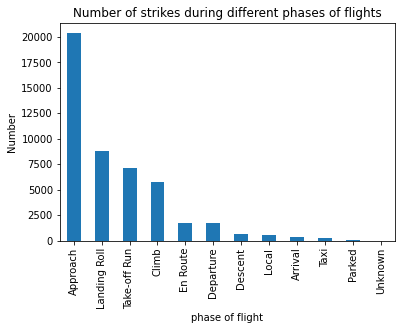

In [29]:
# построим столбчатую диаграмму с количеством страйков во время разных фаз полета воздушного судна
data.phase_of_flight.value_counts().plot.bar()
plt.title('Number of strikes during different phases of flights')
plt.xlabel('phase of flight')
plt.ylabel('Number')
plt.show()

Самое большое количество страйков зафиксировано во время фазы Approach, то есть при подготовке самолета к приземлению. Дадим каждой фазе небольшую расшифровку, а также изучим фазы полета в порядке их выполнения

The order:
- __departure__ This is the preparation time for flight. 
- __take-off run__ Takeoff run phase begins when the crew increases thrust for the purpose of lift-off. It ends when an initial climb is established or the crew aborts its takeoff. 
- __climb__ the period during which the aircraft climbs to a predetermined cruising altitude after take-off.
- __en route__ segment of flight from the termination point of a departure procedure to the origination point of an arrival procedure.
- __descent__  the decrease in altitude from cruise altitude to initial approach altitude. This is approximately 20 minutes from our estimated time of arrival
- __approach__ At this time, the aircraft has to be configured for landing, and this is predominately predetermined at the flight planning stage. The aircraft will gradually slow down, the flaps at the rear of the wings and the slats at the front of the wing will be extended to create more lift at a slower speed, which ultimately lowers our landing speed. The wheels will be lowered and the aircraft will line up on what they call ‘final’ and continue down the approach path and land.
- __landing roll__ After touchdown until aircraft exits the landing runway or comes to a stop, whichever occurs first.
- __arrival__ 
- __taxi__ This is manoeuvring from the runway after landing to the terminal via the taxiways to a designated arrival bay.
- __parked__

In [30]:
data.height.describe()

count    36088.000000
mean       897.433468
std       1840.930735
min          0.000000
25%          0.000000
50%         50.000000
75%       1000.000000
max      29000.000000
Name: height, dtype: float64

In [31]:
data.wnd.sample(5)

63276    360,1,N,0026,1
7738     080,5,N,0026,5
76886    320,5,N,0046,5
6300     999,9,V,0026,5
66575    999,9,C,0000,5
Name: wnd, dtype: object

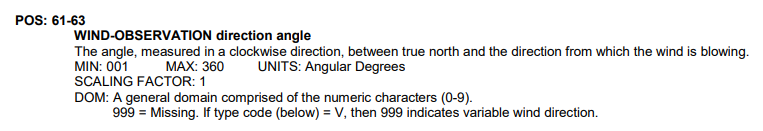

1. Необходимо разбить данные на несколько столбцов: я возьму 1 элемент - угол наклона ветра, 3 - тип ветра и 4 - скорость ветра. Контроли качества отброшу. 
2. можно заполнить пропуски значением (-1) - отсутствующие данные.
3. перевести угол наклона и скорость в целочисленное значение. 

In [32]:
data.loc[:, 'wind_direction'] = data.loc[:, 'wnd'].str.split(',', expand = True)[0]
data['wind_type'] = data['wnd'].str.split(',', expand=True)[2]
data['wind_speed'] = data['wnd'].str.split(',', expand=True)[3]

In [33]:
data['wind_direction'].nunique()

45

In [34]:
data['wind_direction'] = data['wind_direction'].fillna(-1)
data['wind_direction'] = data['wind_direction'].astype('int')
data['wind_direction'].unique()

array([150, 300, 260,  20, 320,  40,  90, 280, 340, 170, 999,  -1, 190,
       250, 100, 310, 270, 140,  50, 200, 350, 330, 160, 220, 230, 240,
       180,  30, 360, 290,  70,  80, 130, 110,  10,  60, 120, 210, 299,
       235, 351, 177,   6, 165, 326,  31])

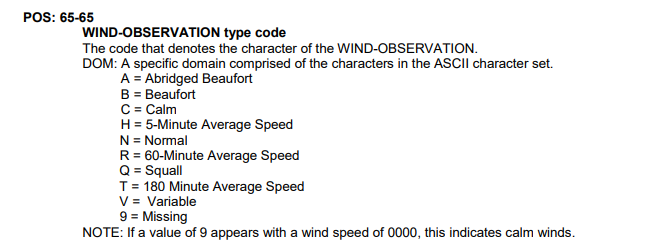

In [35]:
data['wind_type'].value_counts()

N    60639
C    11029
V     2461
9      426
R       48
Name: wind_type, dtype: int64

У нас имеются только N = normal, C = Calm, V = Variable, 9 = Missing, R = 60-Minute Average Speed

In [36]:
data['wind_type'] = data['wind_type'].fillna('-1')
data['wind_type'].unique()

array(['N', 'C', '-1', 'V', 'R', '9'], dtype=object)

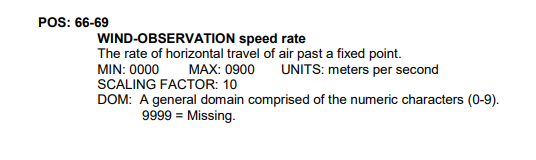

In [37]:
data['wind_speed'].unique()

array(['0021', '0026', '0046', '0015', '0000', nan, '0031', '0041',
       '0093', '0036', '0082', '0051', '0001', '0077', '0072', '0067',
       '0103', '0062', '0057', '9999', '0010', '0108', '0088', '0008',
       '0113', '0098', '0013', '0118', '0002', '0020', '0030', '0022',
       '0050', '0005', '0040', '0160', '0003', '0129', '0006', '0124',
       '0139', '0144', '0035', '0149', '0029', '0060', '0024', '0165',
       '0068', '0090', '0299', '0027', '0201', '0154', '0025', '0070',
       '0134', '0170', '0014', '0032', '0080', '0089'], dtype=object)

In [38]:
data['wind_speed'] = data['wind_speed'].fillna(999)
data['wind_speed'] = data['wind_speed'].astype(int)

In [39]:
data['wind_speed'] = data['wind_speed'] / 10.0
data['wind_speed'].unique()

array([2.100e+00, 2.600e+00, 4.600e+00, 1.500e+00, 0.000e+00, 9.990e+01,
       3.100e+00, 4.100e+00, 9.300e+00, 3.600e+00, 8.200e+00, 5.100e+00,
       1.000e-01, 7.700e+00, 7.200e+00, 6.700e+00, 1.030e+01, 6.200e+00,
       5.700e+00, 9.999e+02, 1.000e+00, 1.080e+01, 8.800e+00, 8.000e-01,
       1.130e+01, 9.800e+00, 1.300e+00, 1.180e+01, 2.000e-01, 2.000e+00,
       3.000e+00, 2.200e+00, 5.000e+00, 5.000e-01, 4.000e+00, 1.600e+01,
       3.000e-01, 1.290e+01, 6.000e-01, 1.240e+01, 1.390e+01, 1.440e+01,
       3.500e+00, 1.490e+01, 2.900e+00, 6.000e+00, 2.400e+00, 1.650e+01,
       6.800e+00, 9.000e+00, 2.990e+01, 2.700e+00, 2.010e+01, 1.540e+01,
       2.500e+00, 7.000e+00, 1.340e+01, 1.700e+01, 1.400e+00, 3.200e+00,
       8.000e+00, 8.900e+00])

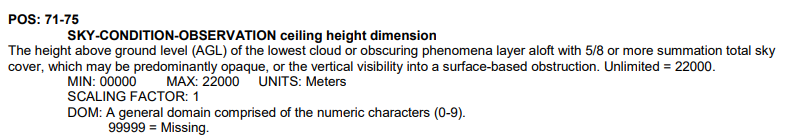

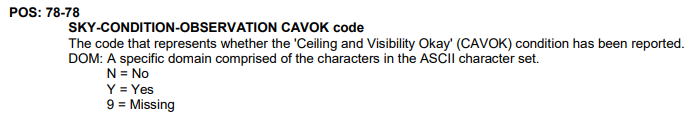

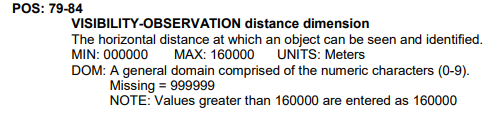

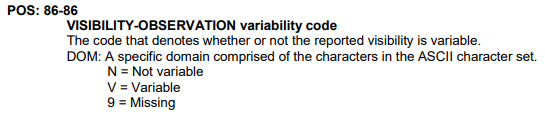

In [40]:
data['vis_distance'] = data['vis'].str.split(',', expand = True)[0]
data['vis_variability'] = data['vis'].str.split(',', expand = True)[2]
data['cig_distance'] = data['cig'].str.split(',', expand = True)[0]
data['cavok'] = data['cig'].str.split(',', expand = True)[3]

In [41]:
data['cig_distance'] = data['cig_distance'].fillna(99999)
data['cig_distance'] = data['cig_distance'].astype('int')

In [42]:
data['cig_distance'].unique()

array([22000,    61, 99999,  1219,   914,  1341,   396,  1250,   244,
         457,   305,  5486,    91,   853,   884,  1829,  9144,   240,
         640,  2438,  2896,   152,  4572,    60,  2286,  1280,   213,
         427,   549,   762,  1463,  1524,  1097,   518,  1372,   732,
        2134,   823,   122,  1006,   183,   120,   488,  5791,   274,
        1402,   335,  7620,  7315,  3353,   701,  1311,  2591,   671,
         610,  3658,  6096,  1128,  2743,  1676,  1981,   366,  6706,
         975,  4877,  1433,  1067,  7010,  4267,  1494,  5182,  3048,
        1189,  3962,  1036,   579,  8400,  8534,  1158,  3000,  6401,
           0,   945,  9000,  7925, 10668,   792,    30,  2700,  3600,
        2042,  2100,  2400,  8230,  8100, 10058,  2012,  1140,  1230,
        7800,  2408,  6000,  4500,  8839,  7200, 10363,  1500,   900,
        3300, 10500,  2377,   750,   420,  9449,   510,  4200,  4800,
        1200,   270,  1080,   300,  3597,  2347,   600,  1646,  1380,
         450])

In [43]:
data['vis_distance'].isna().sum()
data['vis_distance'] = data['vis_distance'].fillna(999999)
data['vis_distance'] = data['vis_distance'].astype(int)
data['vis_distance'].sample(10)

82587     9656
39134    16093
31726    16093
47955    16093
67632    16093
77558    16093
17810    16000
85506    16093
79183    16093
7409     16093
Name: vis_distance, dtype: int32

In [44]:
data.cavok.unique()

array(['N', nan, '9', 'Y'], dtype=object)

In [45]:
data['cavok'] = data['cavok'].fillna('9')
data.cavok.isna().sum()

0

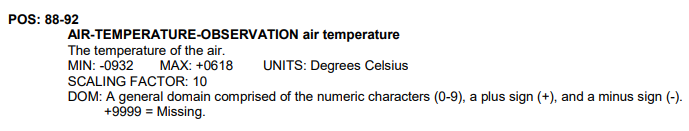

In [46]:
data['tmp'] = data['tmp'].str.split(',', expand = True)[0]
data['tmp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 86852 entries, 0 to 86871
Series name: tmp
Non-Null Count  Dtype 
--------------  ----- 
74603 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [47]:
data['tmp'].isna().sum()

12249

In [48]:
data['tmp'].sample(10)

36970    +0206
71904    +0230
48844    +0167
83450    +0222
21647    +0194
29546      NaN
11329    +0306
73504    +0000
80996    +0300
17556    +0194
Name: tmp, dtype: object

In [49]:
data['tmp'] = data['tmp'].fillna(9999)
data['tmp'] = data['tmp'].astype('int')
data['tmp'] = data['tmp'] / 10
data['tmp'].sample(10)

42237     23.3
74995     28.9
41959     25.6
47141     35.6
77154     18.9
56262    999.9
18557    999.9
14871     26.1
43382     28.9
12382      7.2
Name: tmp, dtype: float64

In [50]:
data['tmp'].isna().sum()

0

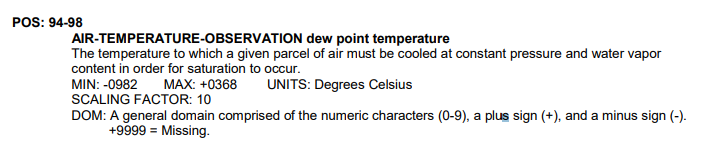

In [51]:
data['dew'].sample(5)

86159    +0156,5
29593    +0039,5
71898    +0239,5
50632    +0156,5
35158    +0061,5
Name: dew, dtype: object

In [52]:
data['dew_tmp'] = data['dew'].str.split(',', expand=True)[0]
data['dew_tmp'] = data['dew_tmp'].fillna(9999)
data['dew_tmp'] = data['dew_tmp'].astype('int')
data['dew_tmp'] = data['dew_tmp'] / 10
data['dew_tmp'].sample(10)

3213      20.6
62485     11.1
54702      9.4
58397     19.4
46674     15.0
6410      15.4
14359    999.9
27429     10.6
41127    999.9
75650     16.1
Name: dew_tmp, dtype: float64

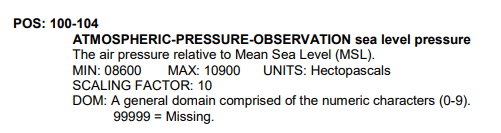

In [53]:
data['slp_hectopascals'] = data['slp'].str.split(',', expand=True)[0]
data['slp_hectopascals'] = data['slp_hectopascals'].fillna(99999)
data['slp_hectopascals'] = data['slp_hectopascals'].astype('int')

In [54]:
data['slp_hectopascals'] = data['slp_hectopascals'] / 10
data['slp_hectopascals'].sample(10)

25683    1016.8
18140    9999.9
50119    9999.9
23277    9999.9
48080    1022.9
37234    1013.5
5894     9999.9
22774    1009.5
9305     1017.3
33868    1028.4
Name: slp_hectopascals, dtype: float64

Руководствуясь <code>[таблицей](https://www.gradusniki.ru/help/mm-hpa.pdf) </code> перевода атмосферного давления из мм ртутного столба в гектопаскали, сделаем категоризацию по повышенному давлению, норме и пониженному

In [55]:
def categorize_slp(slp_hectopascals):
    try:
        if 973 <= slp_hectopascals <= 1012:
            return 'low'
        elif 1013 <= slp_hectopascals <= 1038:
            return 'normal'
        elif  slp_hectopascals >= 1040:
            return 'high'
        elif slp_hectopascals == 9999.9:
            return None
    except:
        pass

In [56]:
data['slp_level'] = data['slp_hectopascals'].apply(categorize_slp)

In [57]:
data['slp_level'].unique()

array(['normal', 'high', 'low', None], dtype=object)

In [58]:
data.species_id.value_counts()

UNKB      13691
UNKBS     11103
O2205      5063
YI005      4069
N5111      3684
YH004      3352
K5114      3076
UNKBM      2501
ZT001      1919
YL001      1547
K3302      1251
YI009      1117
ZT002      1010
O2111       975
Z6007       906
1C2201      791
ZX303       784
T1002       783
ZX3         685
UNKBL       655
NE1         650
Y           632
R1101       603
1C2         551
S5213       530
NE104       464
NE101       436
YI010       413
1C2101      382
YI          380
K1002       373
J2204       362
I1301       360
ZS009       354
N5122       352
Z6004       346
J2109       336
NE114       335
ZT101       327
YI003       300
1F41        286
O22         282
1F11        274
ZD102       264
R2004       260
ZX305       255
ZT000       244
ZZ201       236
Z5301       235
Y9008       232
K33         221
ZL005       215
K3201       209
K2001       207
1C2104      207
ZX328       202
Z6014       199
ZC204       196
ZT104       188
1D11        186
1A1         184
NE141       181
K5102   

In [59]:
data[['species_id', 'species']].sample(10)

species_id                  species
85016       UNKB             Unknown bird
826        ZT103       Brewer's blackbird
68907      YI003             Bank swallow
59262       UNKB             Unknown bird
37778       1D11  Black-tailed jackrabbit
58343         YI                 Swallows
47088      UNKBS     Unknown bird - small
50038      K3302          Red-tailed hawk
20841      O2205            Mourning dove
77766      UNKBS     Unknown bird - small

In [60]:
data.species_id.isna().sum()

1

In [61]:
data.loc[data.species_id.isna()]

incident_date  incident_year  incident_month      time time_of_day  \
62660    2023-07-24           2023               7  21:20:00       Night   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
62660    35.07297    -77.04294       KEWN      ASO     Take-off Run     0.0   

       speed species_id                          species         sky  \
62660    NaN        NaN  Killdeer (Charadrius vociferus)  Some Cloud   

                  wnd          cig           vis   tmp      dew      slp  \
62660  120,5,N,0031,5  22000,5,9,N  016093,5,N,5  29.4  +0233,5  10173,5   

       wind_direction wind_type  wind_speed  vis_distance vis_variability  \
62660             120         N         3.1         16093               N   

       cig_distance cavok  dew_tmp  slp_hectopascals slp_level  
62660         22000     N     23.3            1017.3    normal

In [62]:
data.dropna(subset = ['species_id'], inplace = True)

In [151]:
# уберем из таблицы всех животных, не относящихся к птицам - это коды, начинающиеся с 1, 2 или 3
all_data = data.loc[data.species_id.str.match('^[^123]')].copy()
all_data.sample(10)

incident_date  incident_year  incident_month      time time_of_day  \
31955    2020-07-05           2020               7  20:30:00         NaN   
19383    2019-08-28           2019               8  02:58:00       Night   
21809    2019-06-15           2019               6       NaT         NaN   
48047    2022-10-17           2022              10  23:55:00       Night   
44476    2022-09-19           2022               9       NaT         NaN   
33249    2021-08-03           2021               8  17:00:00         NaN   
24603    2019-12-19           2019              12  15:05:00         Day   
25125    2018-09-18           2018               9  20:54:00       Night   
3308     2018-05-25           2018               5       NaT         NaN   
39435    2022-07-12           2022               7  06:12:00         NaN   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
31955         NaN          NaN       ZZZZ       NaN        En Route   500.0   
19383    35.04242    -89.97667       KMEM      ASO            Climb  2000.0   
21809    40.65236    -75.44040       KABE      AEA              NaN     NaN   
48047    35.04242    -89.97667       KMEM      ASO         Approach  1700.0   
44476         NaN          NaN       ZZZZ       NaN             NaN     NaN   
33249         NaN          NaN       ZZZZ       NaN             NaN     NaN   
24603    28.42889    -81.31603       KMCO      ASO     Landing Roll     0.0   
25125    40.49147    -80.23287       KPIT      AEA         Approach  1000.0   
3308          NaN          NaN       ZZZZ       NaN             NaN     NaN   
39435    39.85841   -104.66700       KDEN      ANM              NaN     NaN   

       speed species_id               species         sky             wnd  \
31955  120.0      UNKBS  Unknown bird - small    No Cloud             NaN   
19383    NaN       UNKB          Unknown bird         NaN  020,1,N,0015,1   
21809    NaN      ZT001    Eastern meadowlark         NaN  999,9,C,0000,1   
48047  160.0       UNKB          Unknown bird    No Cloud  350,5,N,0062,5   
44476    NaN       UNKB          Unknown bird         NaN             NaN   
33249    NaN      UNKBS  Unknown bird - small         NaN             NaN   
24603  110.0      UNKBS  Unknown bird - small  Some Cloud  020,5,N,0072,5   
25125    NaN      ZS008   Common yellowthroat    No Cloud  330,1,N,0031,1   
3308     NaN      YI011  Violet-green swallow         NaN             NaN   
39435    NaN      YH004           Horned lark         NaN  170,5,N,0046,5   

               cig           vis    tmp      dew      slp  wind_direction  \
31955          NaN           NaN  999.9      NaN      NaN              -1   
19383  99999,9,9,N  016000,1,9,9   26.1  +0233,1  10156,1              20   
21809  99999,9,9,N  016000,1,9,9   16.1  +0106,1  10204,1             999   
48047  22000,5,9,N  016093,5,N,5   11.7  -0039,5  10168,5             350   
44476          NaN           NaN  999.9      NaN      NaN              -1   
33249          NaN           NaN  999.9      NaN      NaN              -1   
24603  22000,5,9,N  016093,5,N,5   18.9  +0089,5  10242,5              20   
25125  22000,1,9,N  016000,1,9,9   27.2  +0194,1  10123,1             330   
3308           NaN           NaN  999.9      NaN      NaN              -1   
39435  22000,5,9,N  016093,5,N,5   17.8  +0111,5  10171,5             170   

      wind_type  wind_speed  vis_distance vis_variability  cig_distance cavok  \
31955        -1        99.9        999999             NaN         99999     9   
19383         N         1.5         16000               9         99999     N   
21809         C         0.0         16000               9         99999     N   
48047         N         6.2         16093               N         22000     N   
44476        -1        99.9        999999             NaN         99999     9   
33249        -1        99.9        999999             NaN         99999     9   
24603         N         7.2         

In [152]:
all_data.drop(columns = ['wnd', 'cig', 'vis', 'dew', 'slp'], inplace = True)

In [153]:
all_data.incident_date.dt.year.unique()

array([2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [66]:
all_data = all_data.query('incident_year != 2023')
all_data.sample(2)

incident_date  incident_year  incident_month      time time_of_day  \
65559    2020-05-17           2020               5       NaT         NaN   
82430    2021-09-24           2021               9  09:55:00         Day   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
65559    33.30783   -111.65547       KIWA      AWP              NaN     NaN   
82430    39.10334    -84.41861       KLUK      AGL            Climb    10.0   

       speed species_id               species       sky   tmp  wind_direction  \
65559    NaN      ZT301        Common grackle       NaN  19.0             120   
82430    NaN      UNKBS  Unknown bird - small  No Cloud   6.1             999   

      wind_type  wind_speed  vis_distance vis_variability  cig_distance cavok  \
65559         N         3.6         16093               N         22000     N   
82430         C         0.0          3219               N            61     N   

       dew_tmp  slp_hectopascals slp_level  
65559      3.0            9999.9      high  
82430      6.1            9999.9      high

In [67]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73847 entries, 0 to 86871
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   incident_date     73847 non-null  datetime64[ns]
 1   incident_year     73847 non-null  int64         
 2   incident_month    73847 non-null  int64         
 3   time              60272 non-null  object        
 4   time_of_day       37254 non-null  object        
 5   latitude_x        63527 non-null  float64       
 6   longitude_x       63527 non-null  float64       
 7   airport_id        73847 non-null  object        
 8   faaregion         63527 non-null  object        
 9   phase_of_flight   41114 non-null  object        
 10  height            31466 non-null  float64       
 11  speed             17796 non-null  float64       
 12  species_id        73847 non-null  object        
 13  species           73847 non-null  object        
 14  sky               2995

___Вывод___

в ходе предобработки данные были проверены на пропуски, удалены дубликаты, был исправлен тип данных, где это было необходимо, заполнены пропуски там, где возможно -- в столбцах с данными о погоде, в столбце с временем суток там, где было заполнено время инцидента, по выбранному интервалу. Были добавлены новые столбцы с погодными параметрами. Были категоризированы данные по столбцу с уровнем атмосферного давления на три группы: высокое, нормальное и низкое. 

## Исследовательский анализ данных

In [68]:
all_data.sample(2)

incident_date  incident_year  incident_month      time time_of_day  \
18512    2019-07-29           2019               7  09:22:00         Day   
21515    2019-09-16           2019               9  23:50:00       Night   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
18512    40.77724    -73.87261       KLGA      AEA         Approach   100.0   
21515    40.78839   -111.97777       KSLC      ANM         Approach   300.0   

       speed species_id       species         sky   tmp  wind_direction  \
18512    NaN       UNKB  Unknown bird    No Cloud  26.1             190   
21515    NaN       UNKB  Unknown bird  Some Cloud  28.3             180   

      wind_type  wind_speed  vis_distance vis_variability  cig_distance cavok  \
18512         N         2.1         16093               N         22000     N   
21515         N         6.7         16093               N          3658     N   

       dew_tmp  slp_hectopascals slp_level  
18512     16.7            1015.9    normal  
21515      2.8            1001.4       low

### Количество инцидентов по месяцам и годам

In [69]:
# посчитаем количество инцидентов по месяцам и годам
col_incidents_per_months = all_data.groupby(
    ['incident_year', 'incident_month']
)['incident_date'].agg(['count']).reset_index().rename({
    'incident_year': 'year',
    'incident_month': 'month'
}, axis=1)
col_incidents_per_months['day'] = [1 for i in range(len(col_incidents_per_months))]
col_incidents_per_months['date'] = pd.to_datetime(
    col_incidents_per_months[['year', 'month', 'day']])
col_incidents_per_months

year  month  count  day       date
0   2018      1    421    1 2018-01-01
1   2018      2    433    1 2018-02-01
2   2018      3    647    1 2018-03-01
3   2018      4   1086    1 2018-04-01
4   2018      5   1651    1 2018-05-01
5   2018      6   1242    1 2018-06-01
6   2018      7   1861    1 2018-07-01
7   2018      8   2096    1 2018-08-01
8   2018      9   2125    1 2018-09-01
9   2018     10   2258    1 2018-10-01
10  2018     11    974    1 2018-11-01
11  2018     12    526    1 2018-12-01
12  2019      1    431    1 2019-01-01
13  2019      2    517    1 2019-02-01
14  2019      3    734    1 2019-03-01
15  2019      4   1163    1 2019-04-01
16  2019      5   1706    1 2019-05-01
17  2019      6   1422    1 2019-06-01
18  2019      7   2062    1 2019-07-01
19  2019      8   2308    1 2019-08-01
20  2019      9   2156    1 2019-09-01
21  2019     10   2125    1 2019-10-01
22  2019     11   1125    1 2019-11-01
23  2019     12    529    1 2019-12-01
24  2020      1    402    1 2020-01-01
25  2020      2    413    1 2020-02-01
26  2020      3    626    1 2020-03-01
27  2020      4    467    1 2020-04-01
28  2020      5    708    1 2020-05-01
29  2020      6    891    1 2020-06-01
30  2020      7   1647    1 2020-07-01
31  2020      8   1695    1 2020-08-01
32  2020      9   1611    1 2020-09-01
33  2020     10   1416    1 2020-10-01
34  2020     11    745    1 2020-11-01
35  2020     12    428    1 2020-12-01
36  2021      1    395    1 2021-01-01
37  2021      2    416    1 2021-02-01
38  2021      3    569    1 2021-03-01
39  2021      4    969    1 2021-04-01
40  2021      5   1472    1 2021-05-01
41  2021      6   1271    1 2021-06-01
42  2021      7   2050    1 2021-07-01
43  2021      8   2231    1 2021-08-01
44  2021      9   2042    1 2021-09-01
45  2021     10   1876    1 2021-10-01
46  2021     11    967    1 2021-11-01
47  2021     12    594    1 2021-12-01
48  2022      1    395    1 2022-01-01
49  2022      2    408    1 2022-02-01
50  2022      3    726    1 2022-03-01
51  2022      4   1230    1 2022-04-01
52  2022      5   1628    1 2022-05-01
53  2022      6   1339    1 2022-06-01
54  2022      7   2113    1 2022-07-01
55  2022      8   2269    1 2022-08-01
56  2022      9   2451    1 2022-09-01
57  2022     10   2119    1 2022-10-01
58  2022     11   1098    1 2022-11-01
59  2022     12    572    1 2022-12-01

In [154]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=col_incidents_per_months['date'],
    y=col_incidents_per_months['count'],
))
fig.update_layout(title = 'Распределение количества страйков по годам и месяцам',
                xaxis_title="год и месяц",
                yaxis_title="количество")
fig.show();

Заметна сезонность инцидентов: зимой стабильно меньше столкновений, чем летом. При этом в мае идет скачок, в июне спад, и уже с июля по октябрь видны пики - от 2000 инцидентов в месяц. Посольку мы знаем, что у птиц два периода миграции -- весной и осенью, то можно увидеть два пика соответственно - в мае и в октябре.

In [71]:
# проверим, сохраняется ли тренд по месяцам
month_strikes = all_data.pivot_table(index='incident_month', values='species_id', aggfunc='count').reset_index()
month_strikes

incident_month  species_id
0                1        2044
1                2        2187
2                3        3302
3                4        4915
4                5        7165
5                6        6165
6                7        9733
7                8       10599
8                9       10385
9               10        9794
10              11        4909
11              12        2649

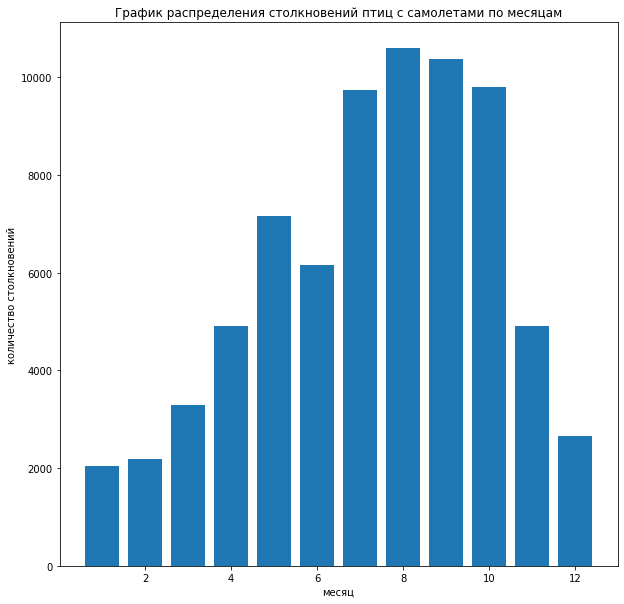

In [72]:
plt.figure(figsize=(10,10))
plt.bar(month_strikes['incident_month'], month_strikes['species_id'])
plt.title('График распределения столкновений птиц с самолетами по месяцам')
plt.xlabel('месяц')
plt.xticks
plt.ylabel('количество столкновений')
plt.show()

Тренд сезонности сохраняется. С мая по октябрь наблюдается период высоких значений страйков.

### Топ аэропортов по столкновениям и по сумме полетов

In [73]:
# сохраним только те аэропорты, по которым есть информация о полетах - это топ-22 аэропорта из таблицы с полетами.
final_data = all_data.loc[all_data.airport_id.str[1:].isin(flight_airports)]
final_data.sample(5)

incident_date  incident_year  incident_month      time time_of_day  \
80784    2021-08-29           2021               8  21:40:00       Night   
34144    2022-02-20           2022               2  13:15:00         NaN   
86821    2020-09-05           2020               9  07:51:00         NaN   
84438    2021-09-02           2021               9       NaT         NaN   
47238    2022-10-09           2022              10  19:50:00       Night   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
80784    42.21206    -83.34884       KDTW      AGL         Approach     NaN   
34144    39.85841   -104.66700       KDEN      ANM              NaN     NaN   
86821    32.84711    -96.85177       KDAL      ASW              NaN     NaN   
84438    28.42889    -81.31603       KMCO      ASO              NaN     NaN   
47238    33.64044    -84.42694       KATL      ASO         Approach   700.0   

       speed species_id               species       sky   tmp  wind_direction  \
80784    NaN      O2205         Mourning dove  Overcast  32.8             230   
34144    NaN      YH004           Horned lark       NaN   3.9             220   
86821    NaN      UNKBS  Unknown bird - small       NaN  25.6             999   
84438    NaN      N5111              Killdeer       NaN  25.0             210   
47238  145.0      Z6018           Wood thrush  No Cloud  22.8             340   

      wind_type  wind_speed  vis_distance vis_variability  cig_distance cavok  \
80784         N         7.7         16093               N         22000     N   
34144         N         5.7         16093               N         22000     N   
86821         C         0.0         16093               N          3962     N   
84438         N         2.1         16000               9         22000     N   
47238         N         2.1         16093               N         22000     N   

       dew_tmp  slp_hectopascals slp_level  
80784     20.0            1012.9      None  
34144    -11.7            1008.4       low  
86821     21.7            1021.5    normal  
84438     23.3            1013.3    normal  
47238      8.3            1021.4    normal

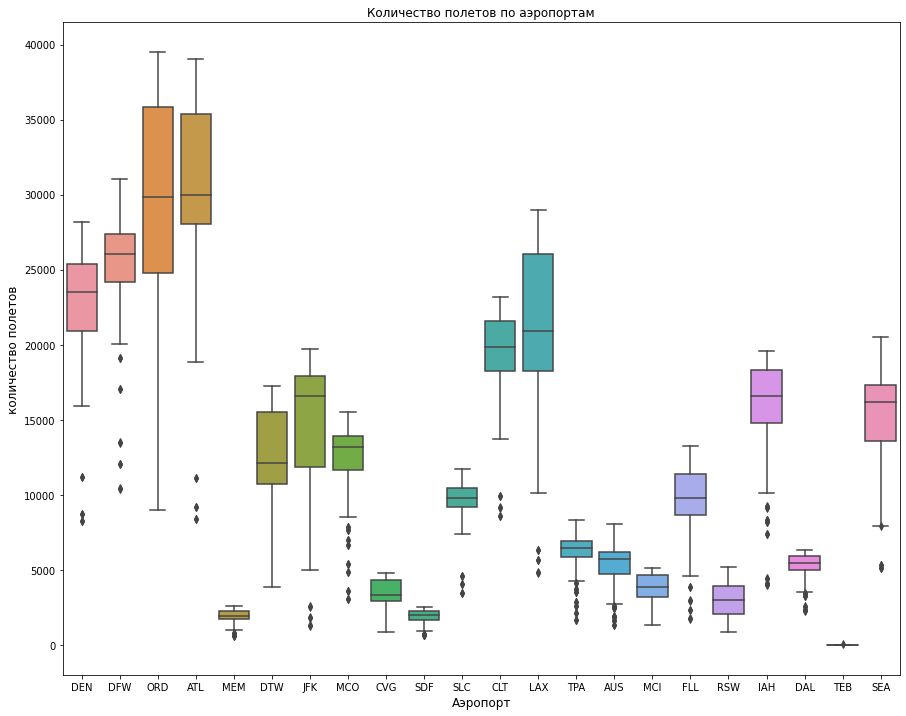

In [74]:
# посмотрим на аэропорты 
plt.figure(figsize=(15,12))
sns.boxplot(data=flights , x='airport', y='total');
plt.title('Количество полетов по аэропортам', fontsize=12)
plt.xlabel('Аэропорт', fontsize=12)
plt.ylabel('количество полетов',fontsize=12)
plt.show();

Аэропорт TEB почти не совершал вылетов, соответственно, этот выброс можно удалить. Самые загруженные аэропорты: ORD, ATL, LAX, DFW. Аэропоты с наименьшим количеством полетов: MEM, SDF, CVG, RSW, MCI.

In [75]:
flights = flights.query('airport != "TEB"')
final_data = final_data.query('airport_id != "KTEB"')

In [76]:
# проверим количество уникальных аэропортов до и после
print(all_data.airport_id.nunique())
print(final_data.airport_id.nunique())

1397
21


In [77]:
#построим сводную таблицу по году, месяцу, аэропортам и количеству страйков
df_strikes = final_data.groupby(
    ['airport_id', 'incident_year', 'incident_month']
)['species_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
df_strikes['airport_id'] = df_strikes.airport_id.str[1:]
df_strikes = df_strikes.rename(columns={'airport_id':'airport', 'incident_year':'year', 'incident_month':'month'})
df_strikes.sample(5)

airport  year  month  count
1122     SEA  2022      8     15
801      MCO  2020      9      9
405      DFW  2022      1      3
820      MCO  2022      4     13
1183     SLC  2022     10     24

In [78]:
# объединим две таблицы по столбцам с уникальными данными - годом, месяцем и айди аэропортов.
df_strikes = df_strikes.merge(
    flights.groupby(['airport', 'year', 'month'])['total'].agg(['mean']).reset_index()
).rename(columns={'count':'strikes', 'mean':'flights'})

df_strikes.sample(5)

airport  year  month  strikes  flights
405      MEM  2020     11       18   1375.5
614      CLT  2021      4       12  20564.0
387      DAL  2018      3       18   6140.0
1145     ORD  2020      1        3  33988.0
481      DAL  2019      5       15   5856.5

In [79]:
# сгруппируем данные по инцидентам в каждом аэропорту 
airport_total = df_strikes.groupby('airport')['strikes'].sum()

# сумма всех столкновений
strikes_sum = airport_total.sum()

strikes_percentage = (airport_total/strikes_sum) * 100

top_strikes_airports = strikes_percentage.sort_values(ascending=False).head(10)

top_airports = top_strikes_airports.reset_index()
top_airports.columns = ['airport', 'strikes%']

fig = px.bar(
    top_airports,
    x = 'airport',
    y='strikes%',
    text = "strikes%",
    title = "Топ-10 аэропортов по количеству страйков в процентном соотношении")

fig.update_traces(texttemplate = '%{text:.2f}%', textposition='outside')

fig.show()


In [80]:
# сгруппируем данные по аэропорту и суммируем страйки и количество полетов
airports_total = df_strikes.groupby('airport')[['strikes', 'flights']].sum()

# отношение общего числа инцидентов по каждому аэропорту к числу полетов
airports_total['incidents_ratio'] = round(airports_total['strikes']/airports_total['flights'] * 100,2)
top10_airports = airports_total.sort_values(by='incidents_ratio', ascending=False).reset_index().head(10)

top10_airports

airport  strikes    flights  incidents_ratio
0     MEM     1179   112428.0             1.05
1     SDF      816   113111.0             0.72
2     CVG      796   206718.5             0.39
3     MCI      697   215483.5             0.32
4     RSW      538   179195.5             0.30
5     DAL      638   301696.5             0.21
6     AUS      655   325385.0             0.20
7     DEN     2550  1353000.0             0.19
8     TPA      589   365544.0             0.16
9     SLC      914   569458.5             0.16

In [81]:
fig = px.bar(
    top10_airports,
    x = 'airport',
    y='incidents_ratio',
    text = "incidents_ratio",
    title = "Топ-10 аэропортов по числу страйков от общего количества полетов")

fig.update_traces(texttemplate = '%{text:.2f}%', textposition='outside')

fig.show()

По количеству страйков лидирует аэропорт Денвера, Даллас Форт-Уэрт, О'Хара, Мемфис, Атланты.

По относительным показателям (соотношение числа страйков к полетам) лидирует аэропорт Мемфиса, самый незагруженный аэропорт датасета, скорее всего, не крупный хаб, а локальный аэропорт. Примечательно, что в эту же выборку попал аэропорт Денвера, один из крупнейших в США. Он лидировал по количеству страйков в абсолютном выражении, но в относительных величинах, ситуация уже иная: он все еще входит в топ-10 аэропортов по столкновениям, но занимает уже не первое, а восьмое место. Нельзя сказать, что чем загруженнее аэропорт, тем больше страйков там происходит. Скорее наоборот, чем меньше аэропорт, тем чаще там случаются столкновения. 

Отмечу также, что пятерка самых крупных в мире аэропортов - это аэропорты Атланты, Далласа, Денвера, Чикаго (ORD) и Лос-Анджелеса. В десятку крупнейших аэропортов в США еще входят аэропорты Шарлотты/Дуглас (CLT), Орландо (MCO)и Лас-Вегас (LAS)

In [82]:
df_strikes.airport.unique()

array(['DEN', 'DFW', 'DTW', 'JFK', 'ORD', 'MEM', 'MCI', 'ATL', 'SDF',
       'SLC', 'CVG', 'MCO', 'CLT', 'RSW', 'LAX', 'FLL', 'AUS', 'DAL',
       'SEA', 'IAH', 'TPA'], dtype=object)

В соответствии с [таблицей](https://www.leonardsguide.com/us-airport-codes.shtml) кодов аэропортов США, можно сделать следующие пометки:

1. ATL - Atlanta Hartsfield International Airport (Georgia)
2. AUS - Austin Bergstrom International Airport (Texas)
3. CLT - Charlotte/Douglas International Airport (North Carolina)
4. CVG -  Cincinnati (Ohio)
5. DAL - Dallas Love Field Airport (Texas)
6. DEN - Denver International Airport (Colorado)
7. DFW - Dallas/Fort Worth International Airport (Texas)
8. DTW - Detroit Metropolitan Airport (Michigan)
9. FLL - Fort Lauderdale-Hollywood International Airport (Florida)
10. IAH - Houston, George Bush Intercontinental Airport (Texas)
11. JFK - New York, John F Kennedy International Airport (New York)
12. LAX - Los Angeles International Airport (California)
13. MCO - Orlando (Florida)
14. MEM - Memphis (Tennessee)
15. ORD - Chicago, O'Hare International Airport (Illinois)
16. RSW - Fort Meyers (Florida)
17. SDF - Louisville (Kentucky)
18. SEA - Seattle, Tacoma International Airport (Washington)
19. SLC - Salt Lake City (Utah)
20. TPA - Tampa (Florida)
21. MCI - Kansas City (Missouri)
22. TEB - Teterboro Airport (New Jersey)

In [155]:
# рассмотрим отдельно аэропорты Мемфиса и Денвера, посмотрим, как менялись за 5 лет показатели по страйкам
Memfis = df_strikes.query('airport == "MEM"').sort_values(by=['year', 'month'])

Memfis['day'] = [1 for i in range(len(Memfis))]
Memfis['date'] = pd.to_datetime(
    Memfis[['year', 'month', 'day']])

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Memfis['date'],
    y=Memfis['strikes'],
))
fig.update_layout(title = 'Распределение количества страйков в аэропорту Мемфиса за 5 лет по месяцам',
                xaxis_title="год",
                yaxis_title="количество")
fig.show();

In [156]:
Denver = df_strikes.query('airport == "DEN"').sort_values(by=['year', 'month'])

Denver['day'] = [1 for i in range(len(Denver))]
Denver['date'] = pd.to_datetime(
    Denver[['year', 'month', 'day']])

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Denver['date'],
    y=Denver['strikes'],
))
fig.update_layout(title = 'Распределение количества страйков в аэропорту Денвера за 5 лет по месяцам',
                xaxis_title="год",
                yaxis_title="количество")
fig.show();

### Взаимосвязь погодных условий с числом столкновений

#### Изучение данных по температуре

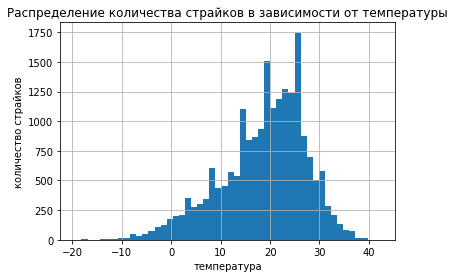

In [157]:
final_data.query('tmp != 999.9').tmp.hist(bins = 50)
plt.title('Распределение количества страйков в зависимости от температуры')
plt.xlabel('температура')
plt.ylabel('количество страйков')
plt.show()

Почти нормальное распределение температурных значений с небольшим отклонением влево. Кроме того, заметны пики, повторяющиеся примерно каждые 5 градусов. 

In [86]:
# температура точки росы
print(final_data.query('dew_tmp != 999.9').dew_tmp.min())
print(final_data.query('dew_tmp != 999.9').dew_tmp.max())
print(final_data.query('dew_tmp != 999.9').dew_tmp.median())

-25.6
27.2
13.3


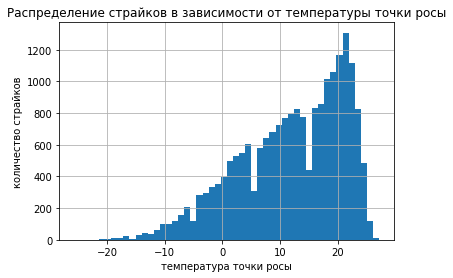

In [158]:
final_data.query('dew_tmp != 999.9').dew_tmp.hist(bins=50)
plt.title('Распределение страйков в зависимости от температуры точки росы')
plt.xlabel('температура точки росы')
plt.ylabel('количество страйков')
plt.show()

Распределение с отклонением влево. Заметно постепенное увеличение страйков с увеличением температуры точки росы.

In [88]:
# посмотрим, есть ли зависимость по температуре в рандомном аэропорте
final_data.query('airport_id == "KATL"').groupby(
    ['incident_year', 'incident_month', 'airport_id']
)['tmp'].agg(['median', 'count']).reset_index()

incident_year  incident_month airport_id  median  count
0            2018               1       KATL   -2.20      7
1            2018               2       KATL   15.80     12
2            2018               3       KATL    7.80     11
3            2018               4       KATL   13.90     23
4            2018               5       KATL   21.70     15
5            2018               6       KATL   23.30     13
6            2018               7       KATL   23.90     33
7            2018               8       KATL   23.30     22
8            2018               9       KATL   26.10     36
9            2018              10       KATL   19.40     34
10           2018              11       KATL    8.30     25
11           2018              12       KATL    6.10     10
12           2019               1       KATL    1.70      7
13           2019               2       KATL    8.90     10
14           2019               3       KATL   12.20     21
15           2019               4       KATL   20.00     20
16           2019               5       KATL   20.60     21
17           2019               6       KATL   23.30     25
18           2019               7       KATL   24.40     25
19           2019               8       KATL   25.85     26
20           2019               9       KATL   27.75     22
21           2019              10       KATL   21.40     52
22           2019              11       KATL    9.70     14
23           2019              12       KATL    7.20      7
24           2020               1       KATL    8.30      9
25           2020               2       KATL   11.00      9
26           2020               3       KATL   15.30     20
27           2020               4       KATL   12.75      6
28           2020               5       KATL   21.10      8
29           2020               6       KATL   24.40     12
30           2020               7       KATL   23.90     19
31           2020               8       KATL   23.90      9
32           2020               9       KATL   23.05     26
33           2020              10       KATL   20.00     19
34           2020              11       KATL   14.00     19
35           2020              12       KATL    5.80      6
36           2021               1       KATL    7.20     12
37           2021               2       KATL   12.25     10
38           2021               3       KATL   14.40      7
39           2021               4       KATL   19.40     13
40           2021               5       KATL   17.50     26
41           2021               6       KATL   22.80     20
42           2021               7       KATL   23.90     31
43           2021               8       KATL   26.10     19
44           2021               9       KATL   22.20     17
45           2021              10       KATL   21.10     35
46           2021              11       KATL   12.20     29
47           2021              12       KATL   13.90     18
48           2022               1       KATL    5.60      7
49           2022               2       KATL   14.40      9
50           2022               3       KATL   15.60     10
51           2022               4       KATL   18.35     16
52           2022               5       KATL   21.70     31
53           2022               6       KATL   26.10     27
54           2022               7       KATL   24.70     34
55           2022               8       KATL   23.90     31
56           2022               9       KATL   25.00     47
57           2022              10       KATL   15.85     30
58           2022              11       KATL   15.00     28
59           2022              12       KATL   11.95      6

Судя по таблице, пока можно только грубо предположить, что с повышением температуры повышается риск страйков. Стоит позже рассмотреть регионы по средним температурам и разделить на условно теплые и условно холодные регионы, чтобы точнее сказать, больше ли страйков в теплых регионах или же нет.

In [89]:
# посмотрим среднегодовую температуру в регионах
regions_mean_tmp = final_data.query('tmp != 999.9')\
    .groupby(
        ['faaregion']
    )['tmp'].agg(['mean']).sort_values(
    by = 'mean', ascending=False).reset_index()
regions_mean_tmp

faaregion       mean
0      ASW   21.561653
1      ASO   20.871121
2      ACE   17.841007
3      AWP   17.564036
4      AGL   16.434935
5      ANM   15.028416
6      AEA   14.592750

В усредненных данных самые холодные регионы: ANM, AEA, AGL

Самые теплые: ASW, ASO, ACE

In [90]:
# сделаем сводную таблицу по регионам, годам, месяцам и аэропортам и посчитаем среднюю температуру и кол-во страйков
regions_tmp = final_data.groupby(['faaregion', 'incident_year', 'incident_month', 'airport_id'])[['tmp']].\
agg({'tmp': ['mean', 'count']}).droplevel(0,1).reset_index()
regions_tmp.airport_id = regions_tmp.airport_id.str[1:]
regions_tmp

faaregion  incident_year  incident_month airport_id        mean  count
0         ACE            2018               2        MCI    3.050000      4
1         ACE            2018               3        MCI    4.150000      2
2         ACE            2018               4        MCI   13.200000      4
3         ACE            2018               5        MCI   18.336842     19
4         ACE            2018               6        MCI   23.500000     16
5         ACE            2018               7        MCI   22.628302     53
6         ACE            2018               8        MCI   19.991176     34
7         ACE            2018               9        MCI   46.605714     35
8         ACE            2018              10        MCI   12.126316     38
9         ACE            2018              11        MCI    2.320000      5
10        ACE            2018              12        MCI    0.000000      2
11        ACE            2019               1        MCI   -0.550000      2
12        ACE            2019               2        MCI  -10.000000      1
13        ACE            2019               3        MCI    4.518182     11
14        ACE            2019               4        MCI   17.514286      7
15        ACE            2019               5        MCI   17.192308     26
16        ACE            2019               6        MCI   67.823810     21
17        ACE            2019               7        MCI   21.375000     12
18        ACE            2019               8        MCI   23.500000     27
19        ACE            2019               9        MCI   23.261111     18
20        ACE            2019              10        MCI   11.247619     21
21        ACE            2019              11        MCI    3.710000     10
22        ACE            2019              12        MCI    0.000000      1
23        ACE            2020               1        MCI   -1.950000      2
24        ACE            2020               2        MCI   -1.133333      3
25        ACE            2020               3        MCI    9.433333      3
26        ACE            2020               4        MCI   13.900000      2
27        ACE            2020               5        MCI   17.450000     10
28        ACE            2020               6        MCI   22.000000      5
29        ACE            2020               7        MCI   24.404762     21
30        ACE            2020               8        MCI   20.707143     28
31        ACE            2020               9        MCI   19.152941     17
32        ACE            2020              10        MCI   13.670000     10
33        ACE            2020              11        MCI   10.425000      4
34        ACE            2021               1        MCI   -5.000000      1
35        ACE            2021               2        MCI   -2.700000      6
36        ACE            2021               3        MCI   15.150000      4
37        ACE            2021               4        MCI   14.622222      9
38        ACE            2021               5        MCI   19.766667     12
39        ACE            2021               6        MCI   22.350000      8
40        ACE            2021               7        MCI   25.052941     17
41        ACE            2021               8        MCI   26.260000     20
42        ACE            2021               9        MCI   22.833333     12
43        ACE            2021              10        MCI   16.941667     12
44        ACE            2021              11        MCI    8.900000      6
45        ACE            2021              12        MCI    4.875000      4
46        ACE            2022               2        MCI    4.833333      3
47        ACE            2022               3        MCI    8.250000      6
48        ACE            2022               4        MCI   11.262500      8
49        ACE            2022               5        MCI   19.964706     17
50        ACE            2022               6        MCI   22.044444      9
51        ACE            2022               7        

In [91]:
# суммируем кол-во вылетов и прилетов по разным аэропортам в таблице с полетами
total_flights = flights.groupby(['year', 'month', 'airport'])['total'].agg(['sum']).reset_index()
total_flights

year  month airport    sum
0     2018      1     ATL  66907
1     2018      1     AUS   9702
2     2018      1     CLT  39493
3     2018      1     CVG   7823
4     2018      1     DAL  12019
5     2018      1     DEN  43930
6     2018      1     DFW  49831
7     2018      1     DTW  29512
8     2018      1     FLL  23444
9     2018      1     IAH  34523
10    2018      1     JFK  32015
11    2018      1     LAX  52042
12    2018      1     MCI   9126
13    2018      1     MCO  26649
14    2018      1     MEM   3939
15    2018      1     ORD  65966
16    2018      1     RSW   7816
17    2018      1     SDF   3711
18    2018      1     SEA  31666
19    2018      1     SLC  19846
20    2018      1     TPA  14399
21    2018      2     ATL  62386
22    2018      2     AUS   8956
23    2018      2     CLT  37408
24    2018      2     CVG   7351
25    2018      2     DAL  10723
26    2018      2     DEN  39445
27    2018      2     DFW  45375
28    2018      2     DTW  26391
29    2018      2     FLL  22096
30    2018      2     IAH  32644
31    2018      2     JFK  30640
32    2018      2     LAX  46923
33    2018      2     MCI   8179
34    2018      2     MCO  24794
35    2018      2     MEM   3668
36    2018      2     ORD  58421
37    2018      2     RSW   7712
38    2018      2     SDF   3421
39    2018      2     SEA  28123
40    2018      2     SLC  18200
41    2018      2     TPA  13420
42    2018      3     ATL  74254
43    2018      3     AUS  10735
44    2018      3     CLT  42651
45    2018      3     CVG   8790
46    2018      3     DAL  12280
47    2018      3     DEN  46228
48    2018      3     DFW  52194
49    2018      3     DTW  32369
50    2018      3     FLL  25441
51    2018      3     IAH  37410
52    2018      3     JFK  33757
53    2018      3     LAX  53301
54    2018      3     MCI   9851
55    2018      3     MCO  29359
56    2018      3     MEM   4297
57    2018      3     ORD  70183
58    2018      3     RSW   9584
59    2018      3     SDF   4015
60    2018      3     SEA  33090
61    2018      3     SLC  21592
62    2018      3     TPA  15990
63    2018      4     ATL  72303
64    2018      4     AUS  11090
65    2018      4     CLT  42366
66    2018      4     CVG   8917
67    2018      4     DAL  11737
68    2018      4     DEN  45472
69    2018      4     DFW  50792
70    2018      4     DTW  31455
71    2018      4     FLL  23922
72    2018      4     IAH  35719
73    2018      4     JFK  35323
74    2018      4     LAX  52868
75    2018      4     MCI   9506
76    2018      4     MCO  27392
77    2018      4     MEM   4246
78    2018      4     ORD  69931
79    2018      4     RSW   6801
80    2018      4     SDF   4221
81    2018      4     SEA  33458
82    2018      4     SLC  20207
83    2018      4     TPA  14387
84    2018      5     ATL  75032
85    2018      5     AUS  11701
86    2018      5     CLT  43963
87    2018      5     CVG   9425
88    2018      5     DAL  12024
89    2018      5     DEN  47627
90    2018      5     DFW  53339
91    2018      5     DTW  32550
92    2018      5     FLL  23122
93    2018      5     IAH  36386
94    2018      5     JFK  37151
95    2018      5     LAX  55059
96    2018      5     MCI   9929
97    2018      5     MCO  26994
98    2018      5     MEM   4545
99    2018      5     ORD  72870
100   2018      5     RSW   4918
101   2018      5     SDF   4692
102   2018      5     SEA  35492
103   2018      5     SLC  20594
104   2018      5     TPA  13893
105   2018      6     ATL  74976
106   2018      6     AUS  11861
107   2018      6     CLT  41123
108   2018      6     CVG   9545
109   2018      6     DAL  11766
110   2018      6     DEN  50415
111   2018      6     DFW  55311
112   2018      6     DTW  32618
113   2018      6     FLL  22778
114   2018      6     IAH  37476
115   2018      6     JFK  37940
116   2018      6     LAX  55840
117   2018      6     MCI  10092
118   2018      6     MCO  26913
119   2018      6     MEM   4636
120   2018   

In [92]:
# объединим таблицы
regions_tmp = regions_tmp.merge(total_flights, left_on=['incident_year', 'incident_month', 'airport_id'], 
    right_on=['year', 'month','airport'])
regions_tmp = regions_tmp.drop(columns=['year', 'month', 'airport'])
regions_tmp

faaregion  incident_year  incident_month airport_id        mean  count  \
0         ACE            2018               2        MCI    3.050000      4   
1         ACE            2018               3        MCI    4.150000      2   
2         ACE            2018               4        MCI   13.200000      4   
3         ACE            2018               5        MCI   18.336842     19   
4         ACE            2018               6        MCI   23.500000     16   
5         ACE            2018               7        MCI   22.628302     53   
6         ACE            2018               8        MCI   19.991176     34   
7         ACE            2018               9        MCI   46.605714     35   
8         ACE            2018              10        MCI   12.126316     38   
9         ACE            2018              11        MCI    2.320000      5   
10        ACE            2018              12        MCI    0.000000      2   
11        ACE            2019               1        MCI   -0.550000      2   
12        ACE            2019               2        MCI  -10.000000      1   
13        ACE            2019               3        MCI    4.518182     11   
14        ACE            2019               4        MCI   17.514286      7   
15        ACE            2019               5        MCI   17.192308     26   
16        ACE            2019               6        MCI   67.823810     21   
17        ACE            2019               7        MCI   21.375000     12   
18        ACE            2019               8        MCI   23.500000     27   
19        ACE            2019               9        MCI   23.261111     18   
20        ACE            2019              10        MCI   11.247619     21   
21        ACE            2019              11        MCI    3.710000     10   
22        ACE            2019              12        MCI    0.000000      1   
23        ACE            2020               1        MCI   -1.950000      2   
24        ACE            2020               2        MCI   -1.133333      3   
25        ACE            2020               3        MCI    9.433333      3   
26        ACE            2020               4        MCI   13.900000      2   
27        ACE            2020               5        MCI   17.450000     10   
28        ACE            2020               6        MCI   22.000000      5   
29        ACE            2020               7        MCI   24.404762     21   
30        ACE            2020               8        MCI   20.707143     28   
31        ACE            2020               9        MCI   19.152941     17   
32        ACE            2020              10        MCI   13.670000     10   
33        ACE            2020              11        MCI   10.425000      4   
34        ACE            2021               1        MCI   -5.000000      1   
35        ACE            2021               2        MCI   -2.700000      6   
36        ACE            2021               3        MCI   15.150000      4   
37        ACE            2021               4        MCI   14.622222      9   
38        ACE            2021               5        MCI   19.766667     12   
39        ACE            2021               6        MCI   22.350000      8   
40        ACE            2021               7        MCI   25.052941     17   
41        ACE            2021               8        MCI   26.260000     20   
42        ACE            2021               9        MCI   22.833333     12   
43        ACE            2021              10        MCI   16.941667     12   
44        ACE            2021              11        MCI    8.900000      6   
45        ACE            2021              12        MCI    4.875000      4   
46        ACE            2022               2        MCI    4.833333      3   
47        ACE            2022               3        MCI    8.250000      6   
48        ACE            2022               4        MCI   11.262500      8   
49        ACE            2022               5        MC

In [93]:
# глянем среднегодовую температуру и общее кол-во полетов по регионам и количество страйков
regions_tmp_strikes = regions_tmp.groupby(['faaregion', 'incident_year'])[['mean', 'count', 'sum']].\
agg({'mean': 'mean',
     'count': 'sum',
    'sum': 'sum'}).reset_index().\
rename(columns={'mean': 'mean_tmp',
               'count': 'strikes_cnt',
               'sum': 'flights_sum'})
regions_tmp_strikes

faaregion  incident_year   mean_tmp  strikes_cnt  flights_sum
0       ACE            2018  15.082577          212       105914
1       ACE            2019  14.966026          157       111147
2       ACE            2020  13.459986          105        57206
3       ACE            2021  14.087653          111        75095
4       ACE            2022  15.136214          112        81605
5       AEA            2018  11.869044          223       428683
6       AEA            2019  11.604134          244       425803
7       AEA            2020  12.422327          118       171481
8       AEA            2021  13.009365          227       258691
9       AEA            2022  12.361256          250       408417
10      AGL            2018  11.016129          628      1234607
11      AGL            2019   9.350669          536      1226611
12      AGL            2020  10.699028          345       671034
13      AGL            2021  16.850631          536       887890
14      AGL            2022  24.670627          564       924379
15      ANM            2018  14.174181          775      1226992
16      ANM            2019  10.352828          776      1276901
17      ANM            2020  13.780144          624       831082
18      ANM            2021  17.237231          841      1141840
19      ANM            2022  19.419462         1052      1180459
20      ASO            2018  22.274144         1451      2405120
21      ASO            2019  19.628608         1698      2467476
22      ASO            2020  19.478257         1145      1500283
23      ASO            2021  19.786869         1488      1986036
24      ASO            2022  20.497809         1649      2069110
25      ASW            2018  21.211211          773      1332843
26      ASW            2019  18.711600          889      1364822
27      ASW            2020  30.095430          572       873833
28      ASW            2021  19.213217          779      1174030
29      ASW            2022  19.491042          753      1292902
30      AWP            2018  16.830746          147       640946
31      AWP            2019  26.162584          174       624325
32      AWP            2020  22.200632          121       307138
33      AWP            2021  29.470896          109       416529
34      AWP            2022  17.259515          114       473625

In [94]:
correlation_matrix = regions_tmp_strikes.corr()

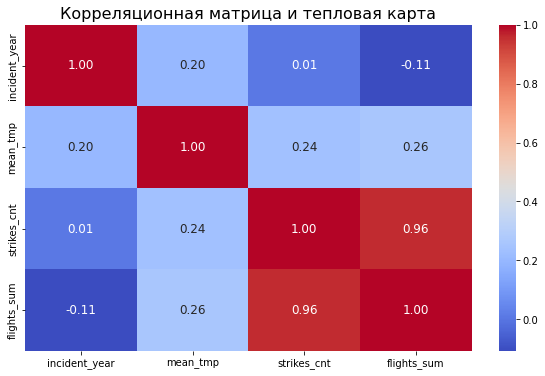

In [95]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Корреляционная матрица и тепловая карта', fontsize=16)
plt.show()

Ничего нового не увидели. Чем больше полетов, тем выше вероятность страйка. Как будто есть небольшая зависимость от температуры.

In [96]:
regions_tmp_strikes.sample(2)

faaregion  incident_year   mean_tmp  strikes_cnt  flights_sum
0       ACE            2018  15.082577          212       105914
19      ANM            2022  19.419462         1052      1180459

In [97]:
# График для средней температуры
fig1 = px.line(regions_tmp_strikes, x='incident_year', y='mean_tmp', color='faaregion',
               title='Средняя температура по регионам и годам')

# График для количества столкновений
fig2 = px.line(regions_tmp_strikes, x='incident_year', y='strikes_cnt', color='faaregion',
               title='Количество столкновений по регионам и годам')

# График для суммы полетов
fig3 = px.line(regions_tmp_strikes, x='incident_year', y='flights_sum', color='faaregion',
               title='Сумма полетов по регионам и годам')

# Отобразите графики
fig1.show()
fig2.show()
fig3.show()

По медианной температуре самые теплые регионы: 
ASO - Southern, ASW - Southwest, AWP - Western Pacific

Самые холодные: 
ACE – Central, AEA – Eastern, AGL – Great Lakes

По количеству столкновений лидируют: Southern,  Northwest Mountain, Southwest

По сумме полетов: Southern, Southwest и Northwest Mountain

In [98]:
# построим то же самое по аэропортам
airports_tmp = final_data.groupby(
    ['incident_year', 'incident_month', 'airport_id']
)['tmp'].agg(['mean', 'count']).reset_index()

airports_tmp.airport_id = airports_tmp.airport_id.str[1:]
airports_tmp

incident_year  incident_month airport_id        mean  count
0              2018               1        ATL    0.000000      7
1              2018               1        AUS   14.200000      4
2              2018               1        CLT   -0.850000      4
3              2018               1        CVG  202.760000      5
4              2018               1        DAL    1.000000      5
5              2018               1        DEN    0.714286      7
6              2018               1        DFW    2.627273     11
7              2018               1        DTW    1.033333      6
8              2018               1        FLL   12.780000      5
9              2018               1        IAH    9.757143      7
10             2018               1        JFK   -3.170000     10
11             2018               1        LAX   13.862500      8
12             2018               1        MCO   11.650000      2
13             2018               1        MEM    2.228571      7
14             2018               1        ORD    1.950000      2
15             2018               1        RSW    9.880000      5
16             2018               1        SDF   15.600000      1
17             2018               1        SEA    6.540000      5
18             2018               1        SLC    0.166667      3
19             2018               1        TPA   11.866667      3
20             2018               2        ATL   14.983333     12
21             2018               2        AUS   10.800000      8
22             2018               2        CLT   10.466667      6
23             2018               2        CVG    5.466667      6
24             2018               2        DAL   15.000000      1
25             2018               2        DEN   -6.100000      3
26             2018               2        DFW   10.372222     18
27             2018               2        DTW    0.771429      7
28             2018               2        FLL   24.575000      4
29             2018               2        IAH   16.120000      5
30             2018               2        JFK    1.225000     12
31             2018               2        LAX   11.866667      3
32             2018               2        MCI    3.050000      4
33             2018               2        MCO   17.316667      6
34             2018               2        MEM    7.900000      5
35             2018               2        ORD   -0.150000      4
36             2018               2        RSW   19.000000      5
37             2018               2        SDF    3.900000      1
38             2018               2        SEA    5.425000      4
39             2018               2        SLC    1.100000      1
40             2018               2        TPA   18.900000      6
41             2018               3        ATL    6.600000     11
42             2018               3        AUS   18.780000      5
43             2018               3        CLT   11.200000      6
44             2018               3        CVG    1.414286      7
45             2018               3        DAL   14.950000     18
46             2018               3        DEN    4.322222     18
47             2018               3        DFW   17.466667      9
48             2018               3        DTW   -2.392857     14
49             2018               3        FLL   21.375000      4
50             2018               3        IAH   16.966667      6
51             2018               3        JFK    2.375000      4
52             2018               3        LAX   14.409091     11
53             2018               3        MCI    4.150000      2
54             2018               3        MCO   18.220000      5
55             2018               3        MEM   14.478571     14
56             2018               3        ORD    0.400000      4
57             2018               3        RSW   20.000000      4
58             2018               3        SDF   10.425000      4
59             2018               3        SEA

In [99]:
airports_tmp = airports_tmp.merge(total_flights, left_on=['incident_year', 'incident_month', 'airport_id'], 
    right_on=['year', 'month','airport'])
airports_tmp

incident_year  incident_month airport_id        mean  count  year  \
0              2018               1        ATL    0.000000      7  2018   
1              2018               1        AUS   14.200000      4  2018   
2              2018               1        CLT   -0.850000      4  2018   
3              2018               1        CVG  202.760000      5  2018   
4              2018               1        DAL    1.000000      5  2018   
5              2018               1        DEN    0.714286      7  2018   
6              2018               1        DFW    2.627273     11  2018   
7              2018               1        DTW    1.033333      6  2018   
8              2018               1        FLL   12.780000      5  2018   
9              2018               1        IAH    9.757143      7  2018   
10             2018               1        JFK   -3.170000     10  2018   
11             2018               1        LAX   13.862500      8  2018   
12             2018               1        MCO   11.650000      2  2018   
13             2018               1        MEM    2.228571      7  2018   
14             2018               1        ORD    1.950000      2  2018   
15             2018               1        RSW    9.880000      5  2018   
16             2018               1        SDF   15.600000      1  2018   
17             2018               1        SEA    6.540000      5  2018   
18             2018               1        SLC    0.166667      3  2018   
19             2018               1        TPA   11.866667      3  2018   
20             2018               2        ATL   14.983333     12  2018   
21             2018               2        AUS   10.800000      8  2018   
22             2018               2        CLT   10.466667      6  2018   
23             2018               2        CVG    5.466667      6  2018   
24             2018               2        DAL   15.000000      1  2018   
25             2018               2        DEN   -6.100000      3  2018   
26             2018               2        DFW   10.372222     18  2018   
27             2018               2        DTW    0.771429      7  2018   
28             2018               2        FLL   24.575000      4  2018   
29             2018               2        IAH   16.120000      5  2018   
30             2018               2        JFK    1.225000     12  2018   
31             2018               2        LAX   11.866667      3  2018   
32             2018               2        MCI    3.050000      4  2018   
33             2018               2        MCO   17.316667      6  2018   
34             2018               2        MEM    7.900000      5  2018   
35             2018               2        ORD   -0.150000      4  2018   
36             2018               2        RSW   19.000000      5  2018   
37             2018               2        SDF    3.900000      1  2018   
38             2018               2        SEA    5.425000      4  2018   
39             2018               2        SLC    1.100000      1  2018   
40             2018               2        TPA   18.900000      6  2018   
41             2018               3        ATL    6.600000     11  2018   
42             2018               3        AUS   18.780000      5  2018   
43             2018               3        CLT   11.200000      6  2018   
44             2018               3        CVG    1.414286      7  2018   
45             2018               3        DAL   14.950000     18  2018   
46             2018               3        DEN    4.322222     18  2018   
47             2018               3        DFW   17.466667      9  2018   
48             2018               3        DTW   -2.392857     14  2018   
49             2018               3        FLL   21.375000      4  2018   
50             2018               3        IAH   16.966667      6  2018   
51             2018               3        JFK    2.375000      4  2018   
52             2018            

In [100]:
airports_tmp = airports_tmp.drop(columns = ['year', 'month', 'month'])

In [101]:
airports = airports_tmp.groupby(
    ['airport_id', 'incident_year']
)[['mean', 'count', 'sum']].agg({
    'mean': 'mean',
    'count': 'sum',
    'sum': 'sum'
}).reset_index().rename(
columns={'mean': 'mean_tmp', 
        'count': 'strikes_cnt', 
        'sum': 'flights_sum'})
airports

airport_id  incident_year   mean_tmp  strikes_cnt  flights_sum
0          ATL           2018  15.862469          241       859781
1          ATL           2019  17.765350          250       867927
2          ATL           2020  16.850472          162       518910
3          ATL           2021  17.569674          237       669856
4          ATL           2022  27.207627          276       686732
5          AUS           2018  20.671958          153       131981
6          AUS           2019  20.306264          164       137938
7          AUS           2020  19.246483           84        74538
8          AUS           2021  18.772416          112       123982
9          AUS           2022  19.811958          142       182331
10         CLT           2018  16.000550          184       504809
11         CLT           2019  17.135961          219       531142
12         CLT           2020  15.983895          105       363844
13         CLT           2021  16.363713          161       439302
14         CLT           2022  16.970460          183       446705
15         CVG           2018  28.617051          138       105670
16         CVG           2019  12.060023          187       105955
17         CVG           2020  10.400450          171        55367
18         CVG           2021  12.135145          140        70176
19         CVG           2022  12.940294          160        76269
20         DAL           2018  17.819873          166       140958
21         DAL           2019  16.999594          133       144931
22         DAL           2020  20.045661          102        86348
23         DAL           2021  19.393845           97       103071
24         DAL           2022  17.829157          140       128085
25         DEN           2018  12.121547          427       566561
26         DEN           2019   9.394240          446       601253
27         DEN           2020  13.255192          408       408088
28         DEN           2021  22.758395          572       551191
29         DEN           2022  29.527413          697       578907
30         DFW           2018  16.791653          311       624548
31         DFW           2019  16.766949          447       674694
32         DFW           2020  18.216977          313       474585
33         DFW           2021  18.092825          442       608828
34         DFW           2022  19.288438          295       613086
35         DTW           2018   9.794011          329       375227
36         DTW           2019  10.157036          220       352056
37         DTW           2020  10.971677          144       205105
38         DTW           2021  22.837178          218       269615
39         DTW           2022  37.398489          240       267143
40         FLL           2018  24.537208          106       275508
41         FLL           2019  24.538353          113       275460
42         FLL           2020  34.802512           73       150460
43         FLL           2021  24.447535          136       214159
44         FLL           2022  24.745233          156       219286
45         IAH           2018  29.561360          143       435356
46         IAH           2019  20.961048          145       407259
47         IAH           2020  62.035119           73       238362
48         IAH           2021  20.735710          128       338149
49         IAH           2022  21.034615          176       369400
50         JFK           2018  11.869044          223       428683
51         JFK           2019  11.604134          244       425803
52         JFK           2020  12.422327          118       171481
53         JFK           2021  13.009365          227       258691
54         JFK           2022  12.361256          250       408417
55         LAX           2018  16.830746          147       640946
56         LAX           2019  26.162584          174       624325
57         LAX           2020  22.200632          121       307138
58         LAX           2021  29.470896          1

In [102]:
# График для медианной температуры
fig1 = px.line(airports, x='incident_year', y='mean_tmp', color='airport_id',
               title='Медианная температура в аэропортах по годам')

# График для количества столкновений
fig2 = px.line(airports, x='incident_year', y='strikes_cnt', color='airport_id',
               title='Количество столкновений в аэропортах по годам')

# График для суммы полетов
fig3 = px.line(airports, x='incident_year', y='flights_sum', color='airport_id',
               title='Сумма полетов в аэропортах по годам')

# Отобразите графики
fig1.show()
fig2.show()
fig3.show()

По **температуре** лидируют следующие аэропорты: FLL (во Флориде), TPA (Флорида), RSW (Флорида)

**По количеству страйков**: DEN (Колорадо), DFW (Техас), ORD (Иллинойс)

**По количеству полетов**: ATL (Джорджия), ORD (Иллинойс), DFW (Техас)

Любопытно, что все они южные.

Тогда посмотрим, где меньше всего страйков и ниже температура. 

**Самая низкая температура**: DEN, ORD, SLC(Юта) (Странно, что низкая медианная температура оказалась в Колорадо и в Иллинойсе)

**По количеству столкновений**: (TEB), SEA(Вашингтон), RSW, FLL

**По количеству полетов**: RSW(Флорида), CVG(Кентукки), MEM (Теннеси) 

Аэропорт TEB не совершал вылетов, соответственно, можем его удалить из обеих выборок.

#### Зависимость сезонных миграций от погоды

In [103]:
final_data.sample(2)

incident_date  incident_year  incident_month      time time_of_day  \
52194    2022-09-28           2022               9  18:12:00         Day   
72955    2020-06-15           2020               6  17:46:00         Day   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
52194    33.64044    -84.42694       KATL      ASO         Approach     NaN   
72955    40.78839   -111.97777       KSLC      ANM         Approach     NaN   

       speed species_id       species  sky   tmp  wind_direction wind_type  \
52194    NaN       UNKB  Unknown bird  NaN  23.3              50         N   
72955    NaN       UNKB  Unknown bird  NaN  24.4             150         N   

       wind_speed  vis_distance vis_variability  cig_distance cavok  dew_tmp  \
52194         4.6         16093               N         22000     N      1.7   
72955         3.1         16093               N          7620     N      2.2   

       slp_hectopascals slp_level  
52194            1020.5    normal  
72955            1012.1      None

In [104]:
final_data.query(
    'incident_month > 2 and incident_month < 6 and tmp != 999.9 and wind_direction != 999 and wind_speed != 999.9'
).groupby([
    'incident_year',
    'incident_month',
    'airport_id'
])[['tmp', 'wind_direction', 'wind_speed', 'incident_date']].agg({
    'tmp': 'median',
    'wind_direction': lambda x: pd.Series.mode(x)[0],
    'wind_speed': 'median',
    'incident_date': 'count'
}).reset_index()

incident_year  incident_month airport_id    tmp  wind_direction  \
0             2018               3       KATL   7.80              80   
1             2018               3       KAUS  20.00             160   
2             2018               3       KCLT  10.60             100   
3             2018               3       KCVG   5.00             200   
4             2018               3       KDAL  16.15             180   
5             2018               3       KDEN   3.90             240   
6             2018               3       KDFW  18.90              20   
7             2018               3       KDTW  -3.90              20   
8             2018               3       KFLL  21.65             110   
9             2018               3       KIAH  18.35             110   
10            2018               3       KJFK   2.80              10   
11            2018               3       KLAX  13.90              70   
12            2018               3       KMCI   4.15             150   
13            2018               3       KMCO  19.40             130   
14            2018               3       KMEM  14.40             200   
15            2018               3       KORD   0.00              40   
16            2018               3       KRSW  25.00             150   
17            2018               3       KSDF  12.50             100   
18            2018               3       KSEA   6.40             140   
19            2018               3       KSLC   6.65              10   
20            2018               3       KTPA  20.00             140   
21            2018               4       KATL  14.45             280   
22            2018               4       KAUS  18.05              10   
23            2018               4       KCLT  14.15              20   
24            2018               4       KCVG   3.30             220   
25            2018               4       KDAL  13.90              50   
26            2018               4       KDEN   6.65             350   
27            2018               4       KDFW  12.75             330   
28            2018               4       KDTW   3.60             250   
29            2018               4       KFLL  25.00             160   
30            2018               4       KIAH  23.35             350   
31            2018               4       KJFK   5.00              20   
32            2018               4       KLAX  14.15             360   
33            2018               4       KMCI  10.55              40   
34            2018               4       KMCO  21.00              40   
35            2018               4       KMEM  12.50              90   
36            2018               4       KORD   5.00             290   
37            2018               4       KRSW  22.75             100   
38            2018               4       KSDF  15.60              60   
39            2018               4       KSEA   8.90             210   
40            2018               4       KSLC  15.55             120   
41            2018               4       KTPA  22.80             170   
42            2018               5       KATL  21.70              90   
43            2018               5       KAUS  30.85             160   
44            2018               5       KCLT  22.10             220   
45            2018               5       KCVG  20.00              80   
46            2018               5       KDAL  26.10             160   
47            2018               5       KDEN  11.40             210   
48            2018               5       KDFW  23.05             190   
49            2018               5       KDTW  17.20             210   
50            2018               5       KFLL  26.05             110   
51            2018               5       KIAH  24.40             160   
52            2018               5       KJFK  17.50             180   
53            2018               5       KLAX  15.85             260   
54            2018               5       KMCI

In [105]:
final_data.query(
    'incident_month > 8 and incident_month < 12 and tmp != 999.9 and wind_direction != 999 and wind_speed != 999.9'
).groupby([
    'incident_year',
    'incident_month'
])[['tmp', 'wind_direction', 'wind_speed', 'incident_date']].agg({
    'tmp': 'median',
    'wind_direction': lambda x: pd.Series.mode(x)[0],
    'wind_speed': 'median',
    'incident_date': 'count'})

tmp  wind_direction  wind_speed  incident_date
incident_year incident_month                                                  
2018          9               21.85              10         3.6            546
              10              15.00             310         3.6            501
              11              10.30             180         4.1            214
2019          9               22.80             170         3.6            498
              10              16.10             300         4.1            504
              11               8.90             340         3.1            242
2020          9               20.60              20         3.1            357
              10              15.60             350         3.6            313
              11              13.95             180         3.6            182
2021          9               21.70             350         3.6            409
              10              18.90             340         3.6            406
              11              10.00              10         3.6            208
2022          9               22.20             330         3.6            554
              10              16.10             350         3.6            466
              11              12.80             230         4.1            254

Согласно [таблице](https://ru-ecology.info/static/pngbig/916084986.png) перевода градусов в румбы, иллюстрирующие более понятное направление ветра, напишем функцию, которая переведет численные значения в буквенные

In [106]:
def wind_rose(v):
    DEG_TO_RUMBS = {
        22: 'N',
        68: 'NE',
        112: 'E',
        158: 'SE',
        202: 'S',
        248: 'SW',
        292: 'W',
        338: 'NW',
        360: 'N'
    }
    
    for deg, rumb in DEG_TO_RUMBS.items():
        if v <= deg:
            return rumb
#     raise Exception(f'Incorrect degree value: {v}')
    return ''
    
final_data['rumbs'] = final_data['wind_direction'].apply(wind_rose)

In [107]:
final_data['rumbs'].unique()

array(['SE', 'NW', 'E', 'S', '', 'NE', 'SW', 'W', 'N'], dtype=object)

In [108]:
wnd_rumbs_count = final_data.query(
    'wind_direction != 999'
).groupby(
    'rumbs'
)['incident_date'].agg(
    ['count']
).reset_index().sort_values(by='count', ascending=False)
wnd_rumbs_count

rumbs  count
4     S   3806
1     N   2498
6    SW   2486
7     W   1906
0     E   1827
5    SE   1800
2    NE   1666
3    NW   1656

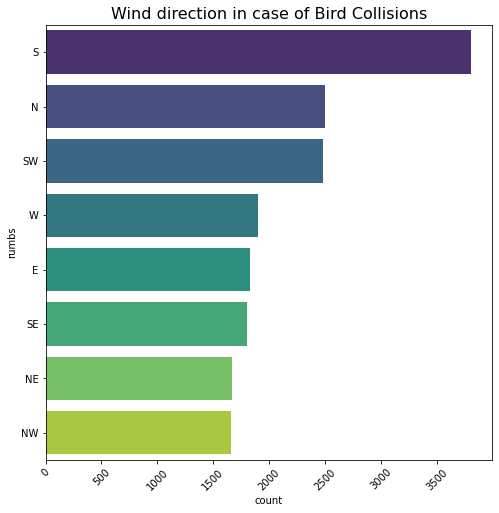

In [109]:
# посмотрим, при каком ветре большое количество страйков
plt.figure(figsize=(8, 8))
sns.barplot(x='count', y='rumbs', data=wnd_rumbs_count, orient='h', palette='viridis')
plt.title("Wind direction in case of Bird Collisions", fontsize=16)

# Поворачиваем метки для лучшей читаемости
plt.xticks(rotation=45)

plt.show()

Видим, что больше всего столкновений приходится на период, когда дует южный ветер. 

__То, что удалось почерпнуть про миграции птиц из интернета__: 

Метеорологические  факторы  зачастую  выполняют роль  триггера  для  начала  миграций.  Они  могут  замедлить  или  остановить мигрантов, заставить их отклониться от курса, приземлиться, иногда приводят к  летальному  исходу.  Например,  массивные  дождевые  фронты  блокируют миграцию.  У  птиц  существует  тенденция  избегать  миграционных  перелетов под воздействием холодных воздушных масс, в то же время есть определенные погодные  условия,  когда  миграция  усиливается.  Так,  осенняя  массовая миграция в высоких широтах северного полушария сопутствует перемещению зоны  низкого  давления  антициклонами.  Весной  массовые  пролеты  птиц происходят  в  условиях  мягкой  погоды,  когда  приближается  фронт  низкого давления.  Мигранты  преимущественно  реагируют  на  местные  изменения погоды  -  ветра  или  температуру,  в  большей  степени,  чем  на  синоптические условия. Большинство исследователей склоняется к мысли, что ветер и  осадки являются  двумя  наиболее  значимыми  факторами,  влияющими  на интенсивность миграции. Роль температуры несколько меньше.

### Время суток и количество столкновений

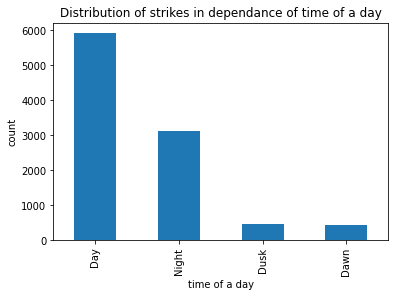

In [110]:
final_data.groupby('time_of_day')['incident_date']\
.agg(['count']).sort_values(by='count', ascending = False)\
.reset_index().plot.bar(x='time_of_day', y = 'count', legend = False)
plt.title('Distribution of strikes in dependance of time of a day')
plt.xlabel('time of a day')
plt.ylabel('count')
plt.show()

In [111]:
strikes_per_time_of_day = final_data.query('time_of_day != "Dawn" and time_of_day != "Dusk"').groupby(
    ['incident_year', 'incident_month', 'time_of_day']
)['airport_id'].agg(['count']).reset_index()
strikes_per_time_of_day

incident_year  incident_month time_of_day  count
0             2018               1         Day     31
1             2018               1       Night     12
2             2018               2         Day     42
3             2018               2       Night     18
4             2018               3         Day     40
5             2018               3       Night     35
6             2018               4         Day     78
7             2018               4       Night     47
8             2018               5         Day    119
9             2018               5       Night     85
10            2018               6         Day    178
11            2018               6       Night     17
12            2018               7         Day    209
13            2018               7       Night     41
14            2018               8         Day    173
15            2018               8       Night     68
16            2018               9         Day    172
17            2018               9       Night    189
18            2018              10         Day    146
19            2018              10       Night    166
20            2018              11         Day     69
21            2018              11       Night     70
22            2018              12         Day     43
23            2018              12       Night     23
24            2019               1         Day     57
25            2019               1       Night      7
26            2019               2         Day     37
27            2019               2       Night     19
28            2019               3         Day     58
29            2019               3       Night     46
30            2019               4         Day     81
31            2019               4       Night     59
32            2019               5         Day    102
33            2019               5       Night    113
34            2019               6         Day     97
35            2019               6       Night     21
36            2019               7         Day    130
37            2019               7       Night     30
38            2019               8         Day    179
39            2019               8       Night     60
40            2019               9         Day    163
41            2019               9       Night    104
42            2019              10         Day    110
43            2019              10       Night    169
44            2019              11         Day     51
45            2019              11       Night     61
46            2019              12         Day     42
47            2019              12       Night      7
48            2020               1         Day     27
49            2020               1       Night     10
50            2020               2         Day     29
51            2020               2       Night     12
52            2020               3         Day     32
53            2020               3       Night     29
54            2020               4         Day     25
55            2020               4       Night     21
56            2020               5         Day     49
57            2020               5       Night     42
58            2020               6         Day     79
59            2020               6       Night      7
60            2020               7         Day    109
61            2020               7       Night     12
62            2020               8         Day     97
63            2020               8       Night     18
64            2020               9         Day    104
65            2020               9       Night     65
66            2020              10         Day     59
67            2020              10       Night     63
68            2020              11         Day     45
69            2020              11       Night     22
70            2020              12         Day     17
71            2020              12       Night     16
72            2021               1         Day     31
73       

In [112]:
strikes_per_time_of_day['day'] = [1 for i in range(len(strikes_per_time_of_day))]
strikes_per_time_of_day = strikes_per_time_of_day.rename(columns={'incident_year': 'year', 'incident_month': 'month'})
strikes_per_time_of_day['date'] = pd.to_datetime(
    strikes_per_time_of_day[['year', 'month', 'day']])
strikes_per_time_of_day

year  month time_of_day  count  day       date
0    2018      1         Day     31    1 2018-01-01
1    2018      1       Night     12    1 2018-01-01
2    2018      2         Day     42    1 2018-02-01
3    2018      2       Night     18    1 2018-02-01
4    2018      3         Day     40    1 2018-03-01
5    2018      3       Night     35    1 2018-03-01
6    2018      4         Day     78    1 2018-04-01
7    2018      4       Night     47    1 2018-04-01
8    2018      5         Day    119    1 2018-05-01
9    2018      5       Night     85    1 2018-05-01
10   2018      6         Day    178    1 2018-06-01
11   2018      6       Night     17    1 2018-06-01
12   2018      7         Day    209    1 2018-07-01
13   2018      7       Night     41    1 2018-07-01
14   2018      8         Day    173    1 2018-08-01
15   2018      8       Night     68    1 2018-08-01
16   2018      9         Day    172    1 2018-09-01
17   2018      9       Night    189    1 2018-09-01
18   2018     10         Day    146    1 2018-10-01
19   2018     10       Night    166    1 2018-10-01
20   2018     11         Day     69    1 2018-11-01
21   2018     11       Night     70    1 2018-11-01
22   2018     12         Day     43    1 2018-12-01
23   2018     12       Night     23    1 2018-12-01
24   2019      1         Day     57    1 2019-01-01
25   2019      1       Night      7    1 2019-01-01
26   2019      2         Day     37    1 2019-02-01
27   2019      2       Night     19    1 2019-02-01
28   2019      3         Day     58    1 2019-03-01
29   2019      3       Night     46    1 2019-03-01
30   2019      4         Day     81    1 2019-04-01
31   2019      4       Night     59    1 2019-04-01
32   2019      5         Day    102    1 2019-05-01
33   2019      5       Night    113    1 2019-05-01
34   2019      6         Day     97    1 2019-06-01
35   2019      6       Night     21    1 2019-06-01
36   2019      7         Day    130    1 2019-07-01
37   2019      7       Night     30    1 2019-07-01
38   2019      8         Day    179    1 2019-08-01
39   2019      8       Night     60    1 2019-08-01
40   2019      9         Day    163    1 2019-09-01
41   2019      9       Night    104    1 2019-09-01
42   2019     10         Day    110    1 2019-10-01
43   2019     10       Night    169    1 2019-10-01
44   2019     11         Day     51    1 2019-11-01
45   2019     11       Night     61    1 2019-11-01
46   2019     12         Day     42    1 2019-12-01
47   2019     12       Night      7    1 2019-12-01
48   2020      1         Day     27    1 2020-01-01
49   2020      1       Night     10    1 2020-01-01
50   2020      2         Day     29    1 2020-02-01
51   2020      2       Night     12    1 2020-02-01
52   2020      3         Day     32    1 2020-03-01
53   2020      3       Night     29    1 2020-03-01
54   2020      4         Day     25    1 2020-04-01
55   2020      4       Night     21    1 2020-04-01
56   2020      5         Day     49    1 2020-05-01
57   2020      5       Night     42    1 2020-05-01
58   2020      6         Day     79    1 2020-06-01
59   2020      6       Night      7    1 2020-06-01
60   2020      7         Day    109    1 2020-07-01
61   2020      7       Night     12    1 2020-07-01
62   2020      8         Day     97    1 2020-08-01
63   2020      8       Night     18    1 2020-08-01
64   2020      9         Day    104    1 2020-09-01
65   2020      9       Night     65    1 2020-09-01
66   2020     10         Day     59    1 2020-10-01
67   2020     10       Night     63    1 2020-10-01
68   2020     11         Day     45    1 2020-11-01
69   2020     11       Night     22    1 2020-11-01
70   2020     12         Day     17    1 2020-12-01
71   2020     12       Night     16    1 2020-12-01
72   2021      1         Day     31    1 2021-01-01
73   2021      1       Night     17    1 2021-01-01
74   2021      2         Day     49    1 2021-02-01
75   2021      2       Night     23    1 2021-02-01
7

In [113]:
fig = px.histogram(
    strikes_per_time_of_day,
    x='date',
    y='count',
    color = 'time_of_day',
    barmode = 'group',
    nbins = 60
)
fig.update_layout(title = 'Strikes distribution during years and months in dependance of time of day',
                xaxis_title="year",                
                yaxis_title="number")
fig.show();

Видно, что количество страйков днем и ночью примерно похожее. Пики почти везде повторяются по месяцам, на которые приходится сезонный пик миграций и соответственно число столкновений птиц с воздушными суднами. 

### Фаза полета и количество столкновений

In [114]:
final_data.airport_id = final_data.airport_id.str[1:]
final_data.groupby(['airport_id', 'phase_of_flight'])['incident_date'].agg(['count']).reset_index()

airport_id phase_of_flight  count
0          ATL        Approach    417
1          ATL         Arrival      1
2          ATL           Climb     78
3          ATL       Departure     15
4          ATL         Descent      8
5          ATL    Landing Roll     91
6          ATL           Local      2
7          ATL    Take-off Run     31
8          ATL            Taxi      2
9          AUS        Approach    216
10         AUS           Climb     67
11         AUS       Departure     16
12         AUS         Descent     14
13         AUS    Landing Roll     62
14         AUS           Local      1
15         AUS    Take-off Run     78
16         CLT        Approach    423
17         CLT         Arrival      6
18         CLT           Climb     84
19         CLT       Departure      5
20         CLT         Descent     17
21         CLT    Landing Roll    103
22         CLT           Local      3
23         CLT    Take-off Run     35
24         CVG        Approach    117
25         CVG         Arrival      3
26         CVG           Climb     53
27         CVG       Departure     13
28         CVG         Descent      2
29         CVG    Landing Roll     84
30         CVG           Local      1
31         CVG    Take-off Run     86
32         DAL        Approach    150
33         DAL         Arrival      3
34         DAL           Climb     51
35         DAL       Departure      6
36         DAL         Descent      4
37         DAL    Landing Roll     35
38         DAL           Local      5
39         DAL    Take-off Run     33
40         DEN        Approach    212
41         DEN         Arrival     23
42         DEN           Climb     84
43         DEN       Departure     51
44         DEN         Descent      7
45         DEN    Landing Roll    408
46         DEN           Local     21
47         DEN    Take-off Run    241
48         DEN            Taxi      1
49         DFW        Approach    306
50         DFW         Arrival      3
51         DFW           Climb     98
52         DFW       Departure     16
53         DFW         Descent     15
54         DFW    Landing Roll    147
55         DFW           Local     13
56         DFW    Take-off Run     58
57         DFW            Taxi      1
58         DTW        Approach    136
59         DTW         Arrival      6
60         DTW           Climb     37
61         DTW       Departure     21
62         DTW         Descent      6
63         DTW    Landing Roll    215
64         DTW           Local      5
65         DTW    Take-off Run     57
66         FLL        Approach    158
67         FLL         Arrival      3
68         FLL           Climb     50
69         FLL       Departure     12
70         FLL         Descent      2
71         FLL    Landing Roll     73
72         FLL           Local      1
73         FLL    Take-off Run     78
74         IAH        Approach    270
75         IAH         Arrival      4
76         IAH           Climb     67
77         IAH       Departure     20
78         IAH         Descent      9
79         IAH    Landing Roll     83
80         IAH           Local     10
81         IAH    Take-off Run     52
82         IAH            Taxi      1
83         JFK        Approach    361
84         JFK         Arrival      3
85         JFK           Climb     62
86         JFK       Departure     17
87         JFK         Descent      8
88         JFK    Landing Roll    112
89         JFK           Local      3
90         JFK    Take-off Run     95
91         JFK            Taxi      1
92         LAX        Approach    221
93         LAX         Arrival      6
94         LAX           Climb     40
95         LAX       Departure     11
96         LAX         Descent     20
97         LAX    Landing Roll    118
98         LAX           Local      1
99         LAX          Parked      1
100        LAX    Take-off Run     42
101        MCI        Approach    186
102        MCI         Arrival      5
103        MCI           Climb     53
104        MCI

In [115]:
fig = px.bar(
    final_data.query('phase_of_flight != "Unknown"').groupby(
        ['airport_id', 'phase_of_flight'])['incident_date']\
    .agg(['count']).reset_index(),
    x='airport_id', y='count', color='phase_of_flight')

fig.update_layout(yaxis={'categoryorder':'category ascending'},
                title = 'Strikes distribution in dependance of phase of flight in airports',
                xaxis_title="phase of flight",                
                yaxis_title="number of strikes")
fig.show()

График иллюстрирует, что самое большое количество столкновений приходится на фазу Approach (300 метров над ВПП), Landing Roll, Take-off Run (до300 метров), что свидетельствует о небольшой высоте, на которых происходят столкновения. То есть столкновения преимущественно происходят при взлете и посадке на взлетно-посадочную полосу. 

In [116]:
approach_strikes = final_data.query('phase_of_flight == "Approach"').groupby(
    'airport_id')['incident_date'].agg(['count'])\
.sort_values(by='count', ascending=False)\
.reset_index()
approach_strikes

airport_id  count
0         MEM    606
1         CLT    423
2         ATL    417
3         SDF    406
4         JFK    361
5         MCO    310
6         DFW    306
7         IAH    270
8         ORD    256
9         SLC    243
10        LAX    221
11        AUS    216
12        DEN    212
13        MCI    186
14        FLL    158
15        SEA    154
16        DAL    150
17        DTW    136
18        TPA    136
19        CVG    117
20        RSW    102

In [159]:
fig = px.bar(approach_strikes, x='airport_id', 
             y = 'count', 
             title='Количество столкновений во время фазы Approach')
fig.update_layout(
                 xaxis_title="аэропорт",                
                 yaxis_title="количество страйков")
fig.show()

In [118]:
landing_roll_strikes = final_data.query('phase_of_flight == "Landing Roll"').groupby(
    'airport_id')['incident_date'].agg(['count'])\
.sort_values(by='count', ascending=False)\
.reset_index()
landing_roll_strikes

airport_id  count
0         DEN    408
1         DTW    215
2         ORD    191
3         MCO    183
4         DFW    147
5         LAX    118
6         JFK    112
7         CLT    103
8         ATL     91
9         CVG     84
10        IAH     83
11        SLC     78
12        FLL     73
13        TPA     73
14        SEA     64
15        MCI     63
16        AUS     62
17        RSW     49
18        MEM     45
19        SDF     39
20        DAL     35

In [160]:
fig = px.bar(landing_roll_strikes, x='airport_id', 
             y = 'count', 
             title='Количество страйков вр время фазы приземления')
fig.update_layout(
                 xaxis_title="аэропорт",                
                 yaxis_title="количество страйков")
fig.show()

In [120]:
Take_off_run_strikes = final_data.query('phase_of_flight == "Take-off Run"').groupby(
    'airport_id')['incident_date'].agg(['count'])\
.sort_values(by='count', ascending=False)\
.reset_index()
Take_off_run_strikes

airport_id  count
0         DEN    241
1         MCO    140
2         ORD     99
3         JFK     95
4         CVG     86
5         FLL     78
6         AUS     78
7         MCI     74
8         TPA     72
9         SEA     61
10        DFW     58
11        DTW     57
12        IAH     52
13        MEM     50
14        SLC     43
15        LAX     42
16        RSW     37
17        CLT     35
18        SDF     35
19        DAL     33
20        ATL     31

In [161]:
fig = px.bar(Take_off_run_strikes, x='airport_id', 
             y = 'count', 
             title='Количество страйков во время фазы взлета')
fig.update_layout(
                 xaxis_title="аэропорт",                
                 yaxis_title="количество страйков")
fig.show()

### Ветер и количество столкновений

In [122]:
print(final_data.query('wind_speed != 999.9').wind_speed.min())
print(final_data.query('wind_speed != 999.9').wind_speed.max())
print(final_data.query('wind_speed != 999.9').wind_speed.median())

0.0
16.5
3.1


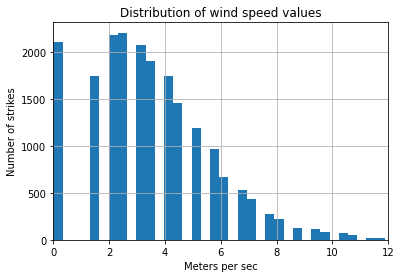

In [123]:
# посмотрим на распределение значений
final_data.query('wind_speed != 999.9').wind_speed.hist(bins=50)
plt.title('Distribution of wind speed values')
plt.xlabel('Meters per sec')
plt.ylabel('Number of strikes')
plt.xlim(0,12)
plt.show()

### Видимость, облачность и количество столкновений

In [124]:
print(final_data.query('vis_distance != 999999').vis_distance.min())
print(final_data.query('vis_distance != 999999').vis_distance.max())
print(final_data.query('vis_distance != 999999').vis_distance.median())

0
16093
16093.0


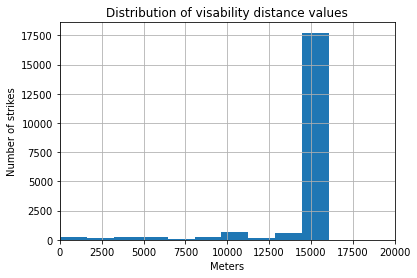

In [125]:
final_data.query('vis_distance != 999999').vis_distance.hist()
plt.title('Distribution of visability distance values')
plt.xlabel('Meters')
plt.ylabel('Number of strikes')
plt.xlim(0, 20000)
plt.show()

In [126]:
print(final_data.query('cig_distance != 99999').cig_distance.min())
print(final_data.query('cig_distance != 99999').cig_distance.max())
print(final_data.query('cig_distance != 99999').cig_distance.median())

0
22000
22000.0


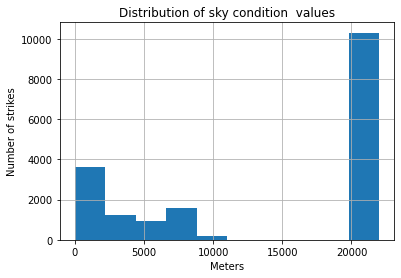

In [127]:
final_data.query('cig_distance != 99999').cig_distance.hist()
plt.title('Distribution of sky condition  values')
plt.xlabel('Meters')
plt.ylabel('Number of strikes')
plt.show()

### Атмосферное давление и количество столкновений

In [128]:
print(final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.min())
print(final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.max())
print(final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.median())

985.2
1042.9
1015.7


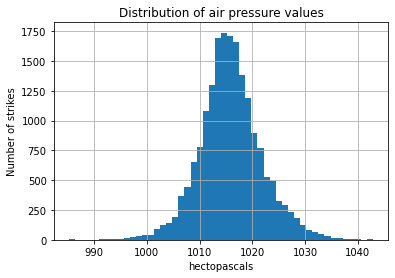

In [129]:
final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.hist(bins=50)
plt.title('Distribution of air pressure values')
plt.xlabel('hectopascals')
plt.ylabel('Number of strikes')
plt.show()

Нормальное распределение, как из учебника.

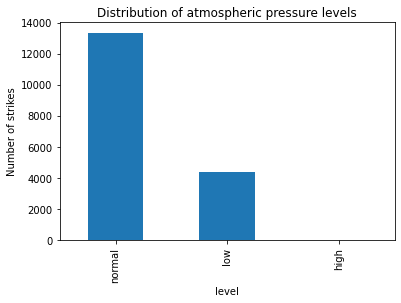

In [130]:
final_data.query('slp_hectopascals != 9999.9').slp_level.value_counts().plot.bar()
plt.title('Distribution of atmospheric pressure levels')
plt.xlabel('level')
plt.ylabel('Number of strikes')
plt.show()

Основное количество столкновений происходит при нормальном атмосферном давлении. Нет страйков при высоком атмосферном давлении.

In [131]:
weather = final_data[['incident_date', 'time_of_day', 'tmp', 'wind_direction', 'wind_type', 'wind_speed', 'vis_distance', 'cig_distance', 'cavok', 'dew_tmp', 'slp_hectopascals', 'slp_level']]
weather.sample(2)

incident_date time_of_day   tmp  wind_direction wind_type  wind_speed  \
16315    2019-07-09         NaN  25.6             170         N         3.1   
14745    2018-03-26         NaN  21.1             160         N         6.7   

       vis_distance  cig_distance cavok  dew_tmp  slp_hectopascals slp_level  
16315         16093          7620     N     20.6            1010.5       low  
14745         16000         99999     N     17.2            1009.4       low

In [132]:
weather.wind_type.value_counts()

N    17627
C     2108
V      504
9       59
Name: wind_type, dtype: int64

### Регионы и аэропорты и количество столкновений

In [133]:
regions = final_data.groupby(
    ['faaregion', 'airport_id'],
    as_index=False
)['incident_date'].agg(['count']).sort_values(
    ['faaregion', 'count'], ascending=False).reset_index()
regions

faaregion airport_id  count
0       AWP         LAX    665
1       ASW         DFW   1808
2       ASW         IAH    665
3       ASW         AUS    655
4       ASW         DAL    638
5       ASO         MEM   1179
6       ASO         ATL   1166
7       ASO         MCO    911
8       ASO         CLT    852
9       ASO         SDF    816
10      ASO         CVG    796
11      ASO         TPA    589
12      ASO         FLL    584
13      ASO         RSW    538
14      ANM         DEN   2550
15      ANM         SLC    914
16      ANM         SEA    604
17      AGL         ORD   1458
18      AGL         DTW   1151
19      AEA         JFK   1062
20      ACE         MCI    697

In [134]:
fig = px.bar(regions, x='airport_id', y = 'count', color = 'faaregion', title='Number of strikes in airports')
fig.update_layout(yaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="airport",                
                 yaxis_title="number of strikes")
fig.show()

По регионам: пиковое число страйков заификсировано в аэропорту Денвера, Northwest Mountain, далее South, Sowthwest, Great Lakes.

### Виды птиц и количество столкновений

In [135]:
total_birds = final_data.species.count()
total_birds

20298

In [136]:
final_data.species_id.str[:1].value_counts() / total_birds * 100

U    28.781161
Y    21.342004
Z    15.168982
O    10.528131
N     8.212632
K     7.744605
R     2.098729
J     1.704601
T     1.241502
I     1.123263
S     0.886787
M     0.571485
H     0.192137
F     0.118238
X     0.108385
Q     0.088679
E     0.044339
P     0.034486
L     0.009853
Name: species_id, dtype: float64

In [137]:
fig = px.bar(final_data.species_id.str[:1].value_counts(), title='Kind of birds in striks')

# Рассчитайте проценты для каждой категории
total = len(final_data)
percentages = final_data.species_id.str[:1].value_counts() / total * 100

# Обновите график с добавлением текста снаружи столбцов
fig.update_traces(text=percentages.round(1).astype(str) + '%', textposition='outside')

fig.update_layout(xaxis_title="species",                
                 yaxis_title="number of strikes", 
                 showlegend=False)

fig.show()

- U - Unknown bird (small, medium, large)
- Y - Воробьинообразные (Passerine)
- Z - perching
- O - Голубеобразные
- N - Трёхпёрсткообразные/ржанкообразные (Shorebirds)
- K - Соколообразные (Falconiformes)
- R - Owls
- J - Гусеобразные
- T - Стрижеобра́зные (Apodiformes)
- I - Аистообразные
- S - Козодоеобра́зные (Caprimulgiformes)
- M - журавлеобразные
- H - пеликанообразные
- X - дятлообразные
- F - Поганковые (Grebes)
- Q - Кукушковые
- E - Гагарообразные
- P - попугаи
- L - курообразные (Galliformes)

Посмотрим, есть ли птицы, которых сбивают преимущественно днем и преимущественно ночью. Для упрощения задачи можно выделить птиц в виды, чтобы не смотреть мелкие подвиды, поэтому рассмотрим только первые два символа кодов. 

In [138]:
birds_all = final_data.groupby([final_data.time_of_day, final_data.species_id.str[:2]])['species'].agg(['count']).reset_index()
birds_day = set(birds_all.query('time_of_day == "Day"')['species_id'])
birds_night = set(birds_all.query('time_of_day == "Night"')['species_id'])
print(list(birds_day - birds_night))
print(list(birds_night - birds_day))

['I5', 'Z8', 'ZZ', 'H2', 'N', 'ZH', 'J', 'E1', 'K', 'K2', 'P1', 'M4', 'N8', 'H4', 'H5']
['R', 'F']


__Птицы, которых сбивают днем:__ аисты, Н2 - пеликаны, H5 - американская змеешейка (Anhinga), I5 - аистовые(Storks), J - утки, гуси, лебеди (ducks, geese, swans), K - соколообразные, N8 - шилоклювковые, попугаи, журавлеобразные, гагарообразные \
__Птицы, которых сбивают ночью:__ R - совы (owls), F - Поганковые (Podicipediformes, днем кормятся, а ночью бывают очень активны в период миграций и брачного периода). 

### Географические данные аэропортов и где больше всего столкновений

In [140]:
airports_total.reset_index(inplace=True)

In [141]:
location_coordinates = final_data[['airport_id', 'latitude_x', 'longitude_x']]
location_coordinates = location_coordinates.drop_duplicates().reset_index(drop=True)
location_coordinates = location_coordinates.rename(columns={'airport_id': 'airport'})
location_coordinates = location_coordinates.merge(airports_total, how='inner', on = 'airport')
location_coordinates

airport  latitude_x  longitude_x  strikes    flights  incidents_ratio
0      DFW    32.89595    -97.03720     1808  1497870.5             0.12
1      IAH    29.98047    -95.33972      665   894263.0             0.07
2      CLT    35.21401    -80.94313      852  1142901.0             0.07
3      LAX    33.94254   -118.40807      665  1231281.5             0.05
4      JFK    40.63975    -73.77893     1062   846537.5             0.13
5      CVG    39.04614    -84.66217      796   206718.5             0.39
6      RSW    26.53617    -81.75517      538   179195.5             0.30
7      TPA    27.97547    -82.53325      589   365544.0             0.16
8      DTW    42.21206    -83.34884     1151   734573.0             0.16
9      DEN    39.85841   -104.66700     2550  1353000.0             0.19
10     ATL    33.64044    -84.42694     1166  1801603.0             0.06
11     SLC    40.78839   -111.97777      914   569458.5             0.16
12     MEM    35.04242    -89.97667     1179   112428.0             1.05
13     DAL    32.84711    -96.85177      638   301696.5             0.21
14     ORD    41.97960    -87.90446     1458  1737687.5             0.08
15     AUS    30.19453    -97.66987      655   325385.0             0.20
16     SEA    47.44898   -122.30931      604   906178.5             0.07
17     FLL    26.07258    -80.15275      584   567436.5             0.10
18     MCI    39.29761    -94.71391      697   215483.5             0.32
19     MCO    28.42889    -81.31603      911   725075.0             0.13
20     SDF    38.17439    -85.73600      816   113111.0             0.72

In [142]:
print('min', location_coordinates['incidents_ratio'].min())
print('mid', (location_coordinates['incidents_ratio'].max() + location_coordinates['incidents_ratio'].min())/2)
print('max', location_coordinates['incidents_ratio'].max())

min 0.05
mid 0.55
max 1.05


In [143]:
import folium 
from folium import Marker, Map

us_map = folium.Map(location = [37.0902, -95.7129], zoom_start = 4)

def get_color(ratio):
    if ratio < 0.38:
        return 'green'
    elif ratio < 0.71:
        return 'yellow'
    else:
        return 'red'

for loc, ratio, airport in zip(
    zip(location_coordinates['latitude_x'], location_coordinates['longitude_x']),
    location_coordinates['incidents_ratio'], location_coordinates['airport']):
    folium.CircleMarker(
        location=loc,
        radius=10 * ratio,
        color=get_color(ratio),
        fill_color=get_color(ratio),
        tooltip=airport
    ).add_to(us_map)
    
# выводим карту
us_map

Точки на карту нанесены по относительному проценту страйков от общего количества полетов. Красным и желтым маркерами отмечены проблемные локальные аэропорты Мемфиса, Луисвилля и Цинцинатти. Предположительно, в этих местах проходит основной путь миграции перелетных птиц.

##  Проверка гипотез

Формулирование гипотез: 

1) при повышении температуры увеличивается риск столкновения птиц с самолетами

2) при южном ветре возрастает риск столкновения птиц с самолетами

### Гипотеза №1

In [144]:
# сгруппируем датасет по месяцам и найдем среднемесячную температуру по регионам
avg_tmp_regions = final_data.groupby(
    ['faaregion', 'incident_year', 'incident_month']
)[['tmp']].agg(
    {'tmp': ['median', 'count']}
).droplevel(0,1).reset_index().rename(
    columns={'median': 'median_tmp',
    'count': 'strikes_cnt'})
avg_tmp_regions

faaregion  incident_year  incident_month  median_tmp  strikes_cnt
0        ACE            2018               2        2.50            4
1        ACE            2018               3        4.15            2
2        ACE            2018               4       10.55            4
3        ACE            2018               5       18.30           19
4        ACE            2018               6       23.30           16
5        ACE            2018               7       21.70           53
6        ACE            2018               8       19.70           34
7        ACE            2018               9       20.00           35
8        ACE            2018              10       12.20           38
9        ACE            2018              11       -1.70            5
10       ACE            2018              12        0.00            2
11       ACE            2019               1       -0.55            2
12       ACE            2019               2      -10.00            1
13       ACE            2019               3        3.30           11
14       ACE            2019               4       18.30            7
15       ACE            2019               5       18.30           26
16       ACE            2019               6       20.00           21
17       ACE            2019               7       21.65           12
18       ACE            2019               8       23.30           27
19       ACE            2019               9       23.90           18
20       ACE            2019              10       12.80           21
21       ACE            2019              11        3.35           10
22       ACE            2019              12        0.00            1
23       ACE            2020               1       -1.95            2
24       ACE            2020               2       -1.70            3
25       ACE            2020               3       12.20            3
26       ACE            2020               4       13.90            2
27       ACE            2020               5       17.50           10
28       ACE            2020               6       22.80            5
29       ACE            2020               7       23.90           21
30       ACE            2020               8       20.30           28
31       ACE            2020               9       18.90           17
32       ACE            2020              10       13.35           10
33       ACE            2020              11        9.15            4
34       ACE            2021               1       -5.00            1
35       ACE            2021               2       -6.40            6
36       ACE            2021               3       15.00            4
37       ACE            2021               4       14.40            9
38       ACE            2021               5       19.70           12
39       ACE            2021               6       21.95            8
40       ACE            2021               7       25.00           17
41       ACE            2021               8       26.70           20
42       ACE            2021               9       22.50           12
43       ACE            2021              10       17.75           12
44       ACE            2021              11        8.35            6
45       ACE            2021              12        4.45            4
46       ACE            2022               2       10.00            3
47       ACE            2022               3        9.45            6
48       ACE            2022               4        9.45            8
49       ACE            2022               5       20.00           17
50       ACE            2022               6       22.20            9
51       ACE            2022               7       23.90           18
52       ACE            2022               8       24.70            8
53       ACE            2022               9       14.75           20
54       ACE            2022              10       14.75           14
55       ACE            2022              11        4.40            7
56       ACE  

In [145]:
# Фильтрация данных для весны (например, месяцы март, апрель, май)
spring_data = avg_tmp_regions[avg_tmp_regions['incident_month'].isin([3, 4, 5])]

# Фильтрация данных для осени (например, месяцы сентябрь, октябрь, ноябрь)
autumn_data = avg_tmp_regions[avg_tmp_regions['incident_month'].isin([9, 10, 11])]

# Вычисление корреляции для весны
spring_corr, _ = stats.pearsonr(spring_data['median_tmp'], spring_data['strikes_cnt'])
print("Корреляция весной:", spring_corr)

# Вычисление корреляции для осени
autumn_corr, _ = stats.pearsonr(autumn_data['median_tmp'], autumn_data['strikes_cnt'])
print("Корреляция осенью:", autumn_corr)


Корреляция весной: 0.47717030165414853
Корреляция осенью: 0.4349129331424598


Значение коэффициента корреляции Пирсона находится в диапазоне от -1 до 1. Чем ближе значение к 1, тем сильнее положительная корреляция. В моем случае, оба значения корреляции положительны, и близки к 0.5, что указывает на умеренную положительную связь между температурой и количеством столкновений.

Это означает, что при повышении температуры риск столкновения птиц с самолетами увеличивается как весной, так и осенью, но связь не является очень сильной.

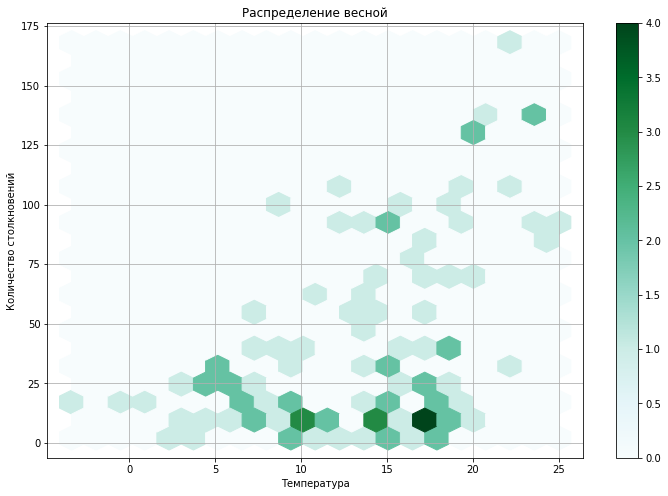

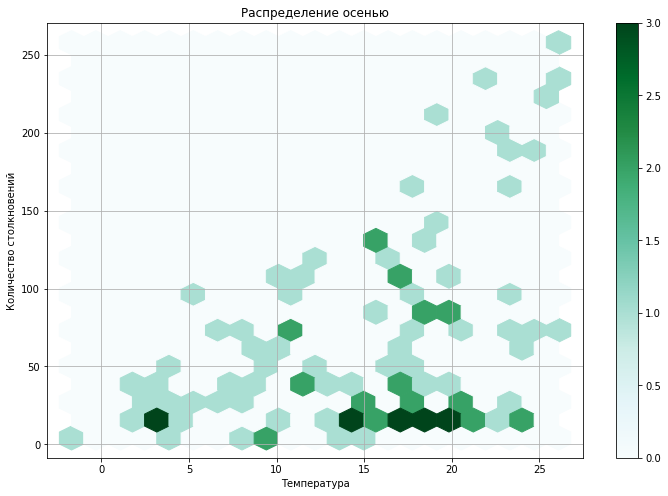

In [146]:
# График для весны
fig, ax = plt.subplots(figsize=(12, 8))

spring_data.plot(x='median_tmp', y='strikes_cnt', kind='hexbin', gridsize=20, sharex=False, grid=True, ax=ax)
plt.title('Распределение весной')
plt.xlabel('Температура')
plt.ylabel('Количество столкновений')
plt.show()

# График для осени
fig, ax = plt.subplots(figsize=(12, 8))

autumn_data.plot(x='median_tmp', y='strikes_cnt', kind='hexbin', gridsize=20, sharex=False, grid=True, ax=ax)
plt.title('Распределение осенью')
plt.xlabel('Температура')
plt.ylabel('Количество столкновений')
plt.show()

### Гипотеза №2

При южном ветре возрастает риск столкновения птиц с самолетами

In [147]:
wnd_direction = final_data.groupby(
    ['rumbs', 'incident_year', 'incident_month']
)['incident_date'].agg(['count']).reset_index()
wnd_direction

rumbs  incident_year  incident_month  count
0                   2018               1     14
1                   2018               2     19
2                   2018               3     20
3                   2018               4     31
4                   2018               5     48
5                   2018               6     38
6                   2018               7     92
7                   2018               8     82
8                   2018               9     76
9                   2018              10     57
10                  2018              11     21
11                  2018              12     25
12                  2019               1     23
13                  2019               2     15
14                  2019               3     31
15                  2019               4     41
16                  2019               5     48
17                  2019               6     57
18                  2019               7     72
19                  2019               8     91
20                  2019               9     67
21                  2019              10     80
22                  2019              11     47
23                  2019              12     30
24                  2020               1     11
25                  2020               2     11
26                  2020               3     16
27                  2020               4     13
28                  2020               5     36
29                  2020               6     41
30                  2020               7     61
31                  2020               8     71
32                  2020               9     79
33                  2020              10     44
34                  2020              11     25
35                  2020              12     18
36                  2021               1     14
37                  2021               2     12
38                  2021               3     18
39                  2021               4     31
40                  2021               5     44
41                  2021               6     57
42                  2021               7     69
43                  2021               8    119
44                  2021               9     66
45                  2021              10     77
46                  2021              11     42
47                  2021              12     24
48                  2022               1     10
49                  2022               2     15
50                  2022               3     25
51                  2022               4     28
52                  2022               5     32
53                  2022               6     66
54                  2022               7     60
55                  2022               8     82
56                  2022               9    100
57                  2022              10     65
58                  2022              11     32
59                  2022              12     14
60      E           2018               1      7
61      E           2018               2     18
62      E           2018               3     19
63      E           2018               4     23
64      E           2018               5     53
65      E           2018               6     38
66      E           2018               7     48
67      E           2018               8     42
68      E           2018               9     95
69      E           2018              10     57
70      E           2018              11     20
71      E           2018              12      6
72      E           2019               1     14
73      E           2019               2     23
74      E           2019               3     20
75      E           2019               4     38
76      E           2019               5     53
77      E           2019               6     44
78      E           2019               7     43
79      E           2019               8     47
80      E           2019               9     63
81      E           2019              10     68
82      E           

In [148]:
spring_months = [3, 4, 5]
autumn_months = [9, 10, 11]

# Создание столбца с сезоном
wnd_direction['season'] = 'Unknown'
wnd_direction.loc[wnd_direction['incident_month'].isin(spring_months), 'season'] = 'Spring'
wnd_direction.loc[wnd_direction['incident_month'].isin(autumn_months), 'season'] = 'Autumn'


# Направления ветра весной и количество страйков
spring_wind = wnd_direction[wnd_direction['season'] == 'Spring']

# Направления ветра осенью и количество страйков
autumn_wind = wnd_direction[wnd_direction['season'] == 'Autumn']

In [149]:
spring = spring_wind.query(
    'rumbs != ""'
).pivot_table(
    index='rumbs', values='count', aggfunc='sum'
).reset_index().sort_values(by='count',ascending=False)
spring

rumbs  count
4     S    940
5    SE    497
1     N    453
0     E    449
6    SW    446
7     W    383
3    NW    319
2    NE    302

In [150]:
autumn = autumn_wind.query(
    'rumbs != ""'
).pivot_table(
    index='rumbs', values='count', aggfunc='sum'
).reset_index().sort_values(by='count',ascending=False)
autumn

rumbs  count
1     N   1053
4     S    821
6    SW    711
3    NW    696
2    NE    679
0     E    607
7     W    598
5    SE    489

## Выводы:

В ходе исследования удалось выявить следующее:

    В столкновениях птиц с самолетами заметна явная сезонность, что может подтверждаться сезонами миграции, которые обычно приходятся на весну и осень. Весной пик риска столкновений приходится на дни с теплой температурой и южными ветрами. Осенью пик столкновения приходится на прохладные дни с преобладающими северными ветрами. Исходя из этого, можно предположить, что благоприятные ветры (попутные) стимулируют миграцию для перелетных птиц и соотвественно, повышают риск столкновений. При этом, кажется, что ветер влияет несколько сильнее, чем температура, хотя влияние температуры, хоть и не подтвердилось на 100%, нельзя отбрасывать.
    
    Также в ходе анализа выяснилось то, что в 2020 году в целом заметно снижение количества столкновений, что связано с пандемией коронавируса. Тогда было сильно сокращено количество международных рейсов. Также в ходе знакомства с данными по числу страйков в абсолютных числах лидерами стали аэропорты Денвера и Атланты. Однако при более детальном погружении в данные оказалось, что в относительных величинах столкновения с птицами преобладают, наоборот, в локальных небольших аэропортах. В частности, выделяется аэропорт Мемфиса.  
    
    Анализ времени суток и числа страйков не показал особых различий между количеством страйков днем или ночью. И там, и там заметна сезонность. Те же самые пики в период миграций перелетных птиц. Кроме того, удалось найти птиц, которых сбивают преимущественно по ночам. Видимо, это связано с циркадными ритмами определенных видов птиц, которые активны ночью (совы и поганковые). 
    
    Также в ходе анализа удалось определить, что самолеты сбивают птиц преимущественно на низкой высоте - обыкновенно страйки случаются в фазе набора высоты и снижения (до 300 метров), при нормальном давлении.